# Introduction:

The hotel industry is a dynamic and competitive sector, where the effective management of resources and operations is essential to the success of an establishment. Among the many challenges facing hotel managers, predicting occupancy rates is a critical aspect. An accurate understanding of future demand not only optimizes resource planning, but also maximizes revenues and enhances the overall guest experience.

In this context, machine learning (ML) technologies offer significant potential for improving the accuracy of occupancy forecasts. By exploiting historical data, seasonal trends, local events and other relevant variables, ML models can provide more reliable and granular predictions, enabling hotels to better anticipate fluctuations in demand and make informed decisions.

The present project aims to develop such a model for predicting hotel occupancy rates, using advanced ML techniques applied to a relevant dataset. In collaboration with Kaggle, a renowned data platform, we have access to a comprehensive dataset including historical occupancy information, as well as other potentially predictive variables.

This report will provide a detailed overview of the model development process, focusing on the various stages of the project lifecycle. We'll start with an in-depth analysis of the business objectives and specific requirements of the hotel sector, followed by data mining and cleaning to prepare the dataset for analysis. Next, we will select and implement the most appropriate ML algorithms, fine-tuning and evaluating them to ensure optimal performance. Finally, we will discuss the practical implications of our model and recommendations for its deployment and use in a real-life operational context.

In summary, this project represents an exciting opportunity to apply ML techniques to a real-life problem in the hotel industry, with the ultimate aim of improving decision-making, optimizing operational performance and enhancing the competitiveness of hotel establishments in a constantly evolving market.

# I. Business Understanding

For the purposes of this report, the Data Business chapter will serve as the foundation for our project to predict hotel occupancy rates using the Kaggle dataset. This chapter will address the key steps required to align our data analysis objectives with business imperatives, focusing on goal setting, situation assessment, defining data mining objectives, and producing a coherent project plan.

### 1. Determining business objectives :
Before diving into data analysis, it's essential to understand the underlying business objectives of our project. These could include optimizing revenues, maximizing operational efficiency, or improving the customer experience. By clearly identifying these objectives, we can direct our data analysis efforts towards creating concrete business value.

### 2. Situation assessment :
This step involves a thorough assessment of the business environment in which our model will be deployed. We will examine market trends, competitive characteristics, existing pricing policies, as well as other external factors that could influence hotel occupancy rates. This contextual analysis will enable us to adapt our prediction model in a relevant and effective way.

### 3. Definition of Data Mining Objectives :
Once the business objectives and situation have been assessed, we can define the precise objectives of our data mining. This could include identifying the relevant variables to be included in the model, choosing the appropriate ML algorithms, and defining the metrics for evaluating model performance. These objectives will guide our analysis process and ensure the relevance of our results.

### 4.Production of a Structured Project Plan :
Finally, we will develop a detailed project plan that will define the specific steps, required resources, timelines, and responsibilities for implementing our hotel occupancy prediction model. This plan will ensure effective project management and guarantee that we achieve our business objectives in an organized and efficient manner.

####  conclusion,
the Data Business chapter of our report will lay the groundwork for the success of our hotel occupancy prediction project using the Kaggle dataset. By aligning our data analysis efforts with strategic business objectives and developing a structured project plan, we will maximize our chances of success in creating an accurate and relevant model for the hotel industry.


##  Packages Import 

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import folium
import plotly.express as px
import sort_dataframeby_monthorweek as sd

#library used for visualizing missing data in datasets
import missingno as msno 

# Function for splitting datasets into training and testing sets
from sklearn.model_selection import train_test_split

from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import RandomForestClassifier

from tensorflow.keras.utils import to_categorical
from keras.layers import Dense
from keras.models import Sequential

plt.style.use('fivethirtyeight')
%matplotlib inline
pd.set_option('display.max_columns', 35)
df= pd.read_csv('hotel_bookings.csv', sep=',')

# II. Data Understanding

The purpose of the data understanding phase is to determine precisely what data ' needs to be analyzed, to identify the quality of the available data and to make the links between the data.
analyze, identify the quality of the data available and make the link between the data
and their meaning from a business point of view.

This data set includes booking information between two types of hotel
types of hotels: City Hotels and Resort Hotels.

## 0. Dataset Loading

In [2]:
df

hotel  is_canceled  lead_time  arrival_date_year  \
0       Resort Hotel            0        342               2015   
1       Resort Hotel            0        737               2015   
2       Resort Hotel            0          7               2015   
3       Resort Hotel            0         13               2015   
4       Resort Hotel            0         14               2015   
...              ...          ...        ...                ...   
119385    City Hotel            0         23               2017   
119386    City Hotel            0        102               2017   
119387    City Hotel            0         34               2017   
119388    City Hotel            0        109               2017   
119389    City Hotel            0        205               2017   

       arrival_date_month  arrival_date_week_number  \
0                    July                        27   
1                    July                        27   
2                    July                        27   
3                    July                        27   
4                    July                        27   
...                   ...                       ...   
119385             August                        35   
119386             August                        35   
119387             August                        35   
119388             August                        35   
119389             August                        35   

        arrival_date_day_of_month  stays_in_weekend_nights  \
0                               1                        0   
1                               1                        0   
2                               1                        0   
3                               1                        0   
4                               1                        0   
...                           ...                      ...   
119385                         30                        2   
119386                         31                        2   
119387                         31                        2   
119388                         31                        2   
119389                         29                        2   

        stays_in_week_nights  adults  children  babies meal country  \
0                          0       2       0.0       0   BB     PRT   
1                          0       2       0.0       0   BB     PRT   
2                          1       1       0.0       0   BB     GBR   
3                          1       1       0.0       0   BB     GBR   
4                          2       2       0.0       0   BB     GBR   
...                      ...     ...       ...     ...  ...     ...   
119385                     5       2       0.0       0   BB     BEL   
119386                     5       3       0.0       0   BB     FRA   
119387                     5       2       0.0       0   BB     DEU   
119388                     5       2       0.0       0   BB     GBR   
119389                     7       2       0.0       0   HB     DEU   

       market_segment distribution_channel  is_repeated_guest  \
0              Direct               Direct                  0   
1              Direct               Direct                  0   
2              Direct               Direct                  0   
3           Corporate            Corporate                  0   
4           Online TA                TA/TO                  0   
...               ...                  ...                ...   
119385  Offline TA/TO                TA/TO                  0   
119386      Online TA                TA/TO                  0   
119387      Online TA                TA/TO                  0   
119388      Online TA                TA/TO                  0   
119389      Online TA                TA/TO                  0   

        previous_cancellations  previous_bookings_not_canceled  \
0                            0                               0   
1                            0        

## 1.1 The data dimension
The quantity of data is a crucial factor in machine learning
(machine learning) and plays an essential role in the performance and predictive
predictive capacity of models

In [3]:
#Nombre de lignes
print("Lignes number :", df.shape[0], "\n")

#Nombre de colonnes
print("Columns number :", df.shape[1], "\n")

Lignes number : 119390 

Columns number : 32 



The reservation data files consist of 119390 rows
and 34 columns. The amount of data is more than sufficient to achieve our
objective

## 1.2 Data information
This can be very useful for quickly understanding the data structure,
identify columns with missing values and determine data types
to plan data cleansing and manipulation, especially for analysis or
analysis or modeling.

The figure contains information on the reservation data.

In [50]:
# Afficher les informations sur le DataFrame
print(df.info())

<class 'pandas.core.frame.DataFrame'>
Index: 86639 entries, 2 to 119389
Data columns (total 28 columns):
 #   Column                          Non-Null Count  Dtype         
---  ------                          --------------  -----         
 0   hotel                           86639 non-null  object        
 1   is_canceled                     86639 non-null  int64         
 2   lead_time                       86639 non-null  int64         
 3   arrival_date_month              86639 non-null  object        
 4   arrival_date_week_number        86639 non-null  int64         
 5   arrival_date_day_of_month       86639 non-null  int64         
 6   stays_in_weekend_nights         86639 non-null  int64         
 7   stays_in_week_nights            86639 non-null  int64         
 8   adults                          86639 non-null  int64         
 9   children                        86639 non-null  float64       
 10  babies                          86639 non-null  int64         
 11  meal  

This dataset comprises 32 columns with the following descriptions: 

- hotel: Hotel (H1 = Resort Hotel or H2 = City Hotel).

- is cancelled: Value indicating whether the reservation has been cancelled (1) or not (0).

- lead time: Number of days elapsed between the reservation entry date in the PMS and the arrival date.

- Arrival date year: Year of arrival date.

- Arrival date month: Month of arrival date.

- Arrival date week: Arrival date week number of the year.

- Arrival date day: Arrival date day.

- stays in week nights: Number of week nights (Monday to Friday) during which the guest has stayed or booked a stay at the hotel.

- adults: Number of adults.

- children: Number of children.

- babies: Number of babies.

- meal : Type of meal booked.

- BB to “Breakfast Buffet”: This means that breakfast is included in the price of the reservation in the form of a buffet.

- FB to “Full Board”: This indicates that breakfast, lunch and dinner are included in the booking price.

- HB to “Half Board”: This means that breakfast and dinner are included in the price of the reservation.

- SC to “Special Conditions”: This value could indicate that special conditions apply to the booking concerning meals. These could be special promotions, special diets, or other non-standard conditions.

- Undefined: This value may indicate that the type of meal included is not clearly defined or has not been specified for certain reservations.

- Country: Country of origin. Categories are represented in ISO 3155-3:2013 format.

- market segment : Market segment designation.

- Direct: Direct bookings without intermediaries.

- Corporate: Corporate bookings.

- Online TA: Bookings via online travel agencies.

- Offline TA/TO: Bookings via offline travel agencies.

- Complementary: Partner or complementary customers.

- Groups: Group bookings.

- Undefined: Segment not specified.

- Aviation: Aviation-related bookings.

- distribution channel: Booking distribution channel. 

- Direct: Direct booking with no intermediary.
- Corporate: Booking made by a company.

- TA/TO: Booking via a travel agency or tour operator.

- Undefined: Distribution channel not specified.

- GDS: Booking via a Global Distribution System.

- is repeated guest: Value indicating whether the booking name came from a repeated guest (1) or not (0).

- previous cancellations: Number of previous bookings cancelled by the customer before the current booking.

- previous bookings not cancelled: Number of previous bookings not cancelled by the customer before the current booking.

- reserved room type: Code for the type of room reserved. The code is shown instead of the designation:

    - C : Standard or double room.

    - A : Suite.

    - E : Executive Room.

    - D: Deluxe Room.

- assigned room type: Code of the room type assigned to the reservation. In some cases, the assigned room type may differ from the room type booked, for hotel operational reasons (e.g. overbooking) or at the customer's request. The code is shown instead of the designation:
    
    - C : Standard or double room.

    - A : Suite.

    - D : Deluxe Room.
    
    - E : Executive Room.
    
    - G: Club Room or Executive Suite.
    
    - F: Family room.

    - I: Junior Suite.
    
    - B: Deluxe Room.

    - H: Suite room.

    - P: Presidential room.
    
    - L: Deluxe room with view.
    
    - K: Club room with view.

- booking changes: Number of changes/amendments made to the booking from the time the booking was entered on the PMS to the time of check-in or cancellation.

- deposit type: Indication of whether the customer has made a deposit to guarantee the reservation. This variable can take three categories:

- No Deposit: No deposit is required for the reservation. Customers can confirm their reservation without having to pay an initial amount.

- Refundable: The deposit is refundable. If customers cancel their reservation before a certain deadline, they can obtain a refund of the deposit amount.

- Non Refundable: The deposit is non-refundable. Once paid, the deposit amount will not be refunded to customers, even if the reservation is cancelled.

- agent: Identifier of the travel agency that made the booking.

- company: ID of the company/entity making the booking or responsible for payment of the booking. The ID is presented instead of the designation for reasons of anonymity.

- day in waiting list: Number of days the reservation was on the waiting list before being confirmed to the customer.

- customer type: Type of booking, assuming one of the following four categories:
    
    - Transient: Short stay, no group or contract.
    
    - Contract: Stay with contract or allotment.

    - Transient Party: Short stay associated with another short stay.

    - Group: Stay associated with a group.

- adr: Average daily rate.

- required car parking spaces: Number of parking spaces required by the customer.

- total of special requests: Number of special requests made by the customer (e.g. twin bed or high floor).

- reservation status: Last reservation status, assuming one of the following three categories:
    
    - Check-Out: Customer has checked out.
    
    - Cancelled: The reservation has been cancelled.

    - No-Show: Customer has not arrived.

- reservation status date: Date on which the last status was set. This variable can be used in conjunction with reservation status to understand when the reservation was cancelled or when the guest left the hotel.
left the hotel.

## 2. Check data quality

### 2.1 Identification of duplicates

A key step in the data pre-processing process is to identify the number of duplicates present in the dataset. This phase enables us to quantify the extent of the duplicate record problem, which is essential for assessing the potential impact on subsequent analysis. We use various methods, such as counting occurrences of identical values or comparing rows on specific criteria, to detect duplications. This initial step provides crucial information to guide data cleansing decisions and guarantee the quality and reliability of analysis results.

In [4]:
# Duplicate lines
doublons = df.duplicated().sum()
print("\nNombre de lignes en double (à l'exclusion de l'ID):", doublons)

# 31994


Nombre de lignes en double (à l'exclusion de l'ID): 31994


#### 2.2. Identification of null values and their percentage

In the phase of identifying null values and their percentage, our aim is to understand the extent of missing data in the dataset. We analyze each variable to identify null values and calculate their proportion in relation to the total number of observations. This step provides us with an overview of data quality and enables us to make informed decisions on how to deal with missing values. By better understanding the nature and extent of this problem, we are able to put in place appropriate cleaning and imputation strategies to ensure the reliability and relevance of our subsequent analyses.

In [5]:
val_null = pd.DataFrame({'Null Values' : df.isna().sum(), 'Percentage Null Values' : (df.isna().sum()) / (df.shape[0]) * (100)})
val_null

Null Values  Percentage Null Values
hotel                                     0                0.000000
is_canceled                               0                0.000000
lead_time                                 0                0.000000
arrival_date_year                         0                0.000000
arrival_date_month                        0                0.000000
arrival_date_week_number                  0                0.000000
arrival_date_day_of_month                 0                0.000000
stays_in_weekend_nights                   0                0.000000
stays_in_week_nights                      0                0.000000
adults                                    0                0.000000
children                                  4                0.003350
babies                                    0                0.000000
meal                                      0                0.000000
country                                 488                0.408744
market_segment                            0                0.000000
distribution_channel                      0                0.000000
is_repeated_guest                         0                0.000000
previous_cancellations                    0                0.000000
previous_bookings_not_canceled            0                0.000000
reserved_room_type                        0                0.000000
assigned_room_type                        0                0.000000
booking_changes                           0                0.000000
deposit_type                              0                0.000000
agent                                 16340               13.686238
company                              112593               94.306893
days_in_waiting_list                      0                0.000000
customer_type                             0                0.000000
adr                                       0                0.000000
required_car_parking_spaces               0                0.000000
total_of_special_requests                 0                0.000000
reservation_status                        0                0.000000
reservation_status_date                   0                0.000000

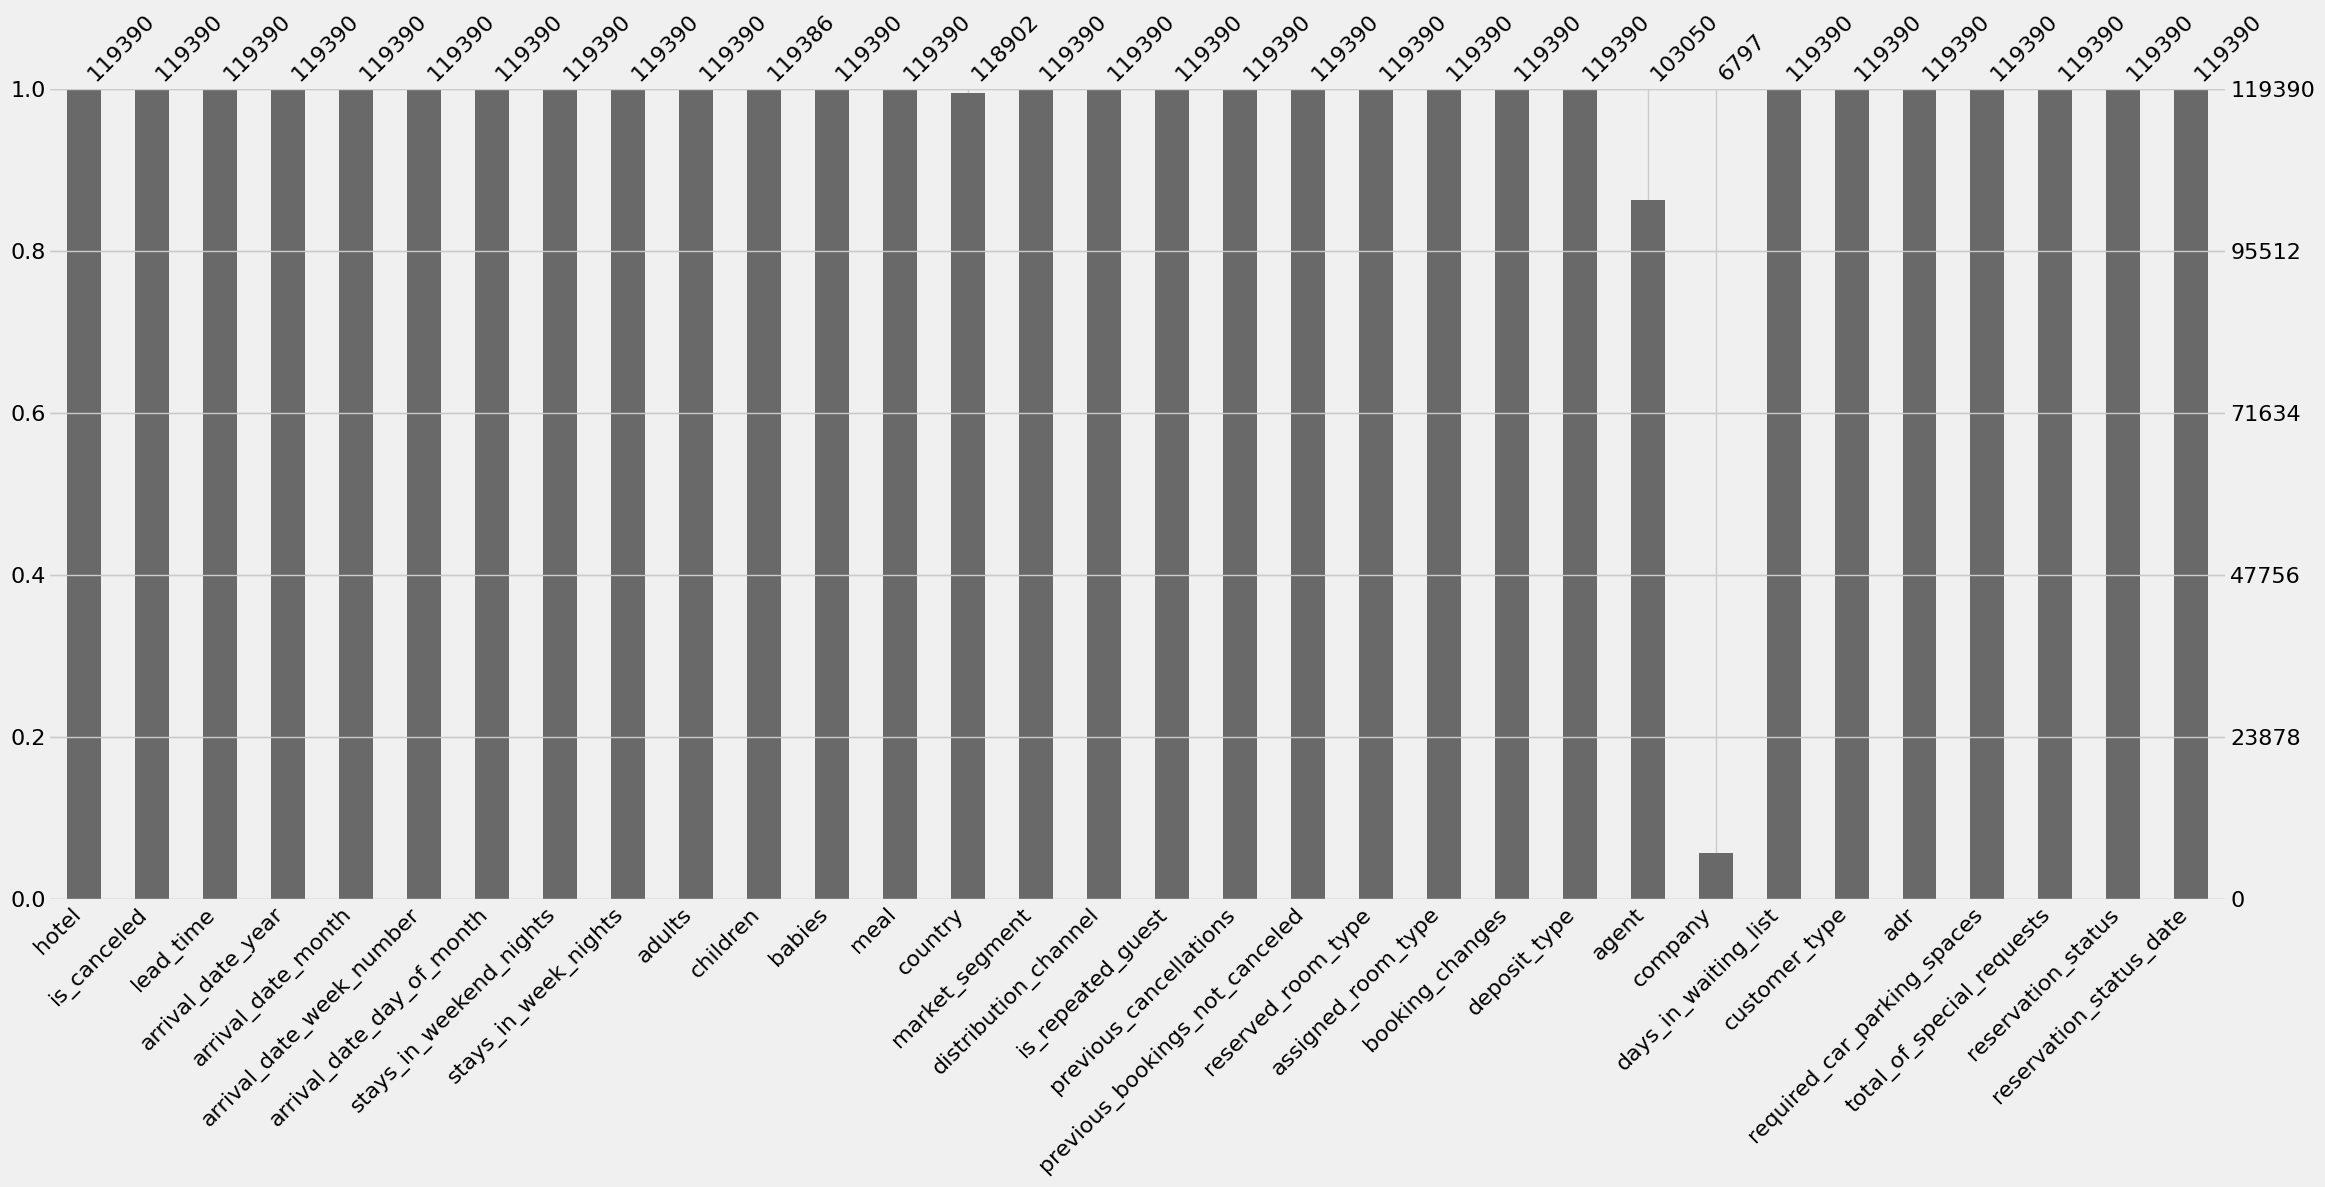

In [5]:
msno.bar(df)
plt.show()

## 3. Examine the distribution of variables

In this phase, we examine the distribution of variables in the dataset. This step enables us to quickly understand the distribution of the data and identify any trends or anomalies. By analyzing the distribution of variables, we can gain valuable insights into the variability of the data and its predictive potential.

### 3.1 Drop Duplicate lines

In [6]:
df = df.drop_duplicates()

### 3.2 Handling null values

#### 3.2.1 Replace null numeric values with the median

In [7]:
# Select numeric columns from the dataframe
df_num = df.select_dtypes(include=[np.number])

# Replace null values in numeric columns with their median value
df_num.fillna(df_num.median(), inplace=True)

df.update(df_num)  

In [8]:
# Ensure the 'country' column has no null values by filling them with "NULL"
df['country'] = df['country'].fillna("NULL")

# Replace any "NULL" values with the most frequent value
most_frequent_country = df['country'].mode()[0]
df['country'] = df['country'].replace("NULL", most_frequent_country)

C:\Users\Mossab Weda\AppData\Local\Temp\ipykernel_18108\3020898789.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['country'] = df['country'].fillna("NULL")
C:\Users\Mossab Weda\AppData\Local\Temp\ipykernel_18108\3020898789.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['country'] = df['country'].replace("NULL", most_frequent_country)


### 3.2.2 Removing Unnecessary Columns and Rows

In [9]:
# Colonnes presque vides
colonnes_presque_vides = [colonne for colonne in df.columns if df[colonne].isnull().sum() >= 0.9 * len(df)]
print("Columns almost empty :",colonnes_presque_vides)

Columns almost empty : []


In [9]:
# Filter rows where 'adults', 'babies', and 'children' are all zero
invalid_rows = (df['adults'] == 0) & (df['babies'] == 0) & (df['children'] == 0)

# Remove invalid rows from the dataframe
df = df[~invalid_rows]

# Display the cleaned dataframe
df

hotel  is_canceled  lead_time  arrival_date_year  \
0       Resort Hotel            0        342               2015   
1       Resort Hotel            0        737               2015   
2       Resort Hotel            0          7               2015   
3       Resort Hotel            0         13               2015   
4       Resort Hotel            0         14               2015   
...              ...          ...        ...                ...   
119385    City Hotel            0         23               2017   
119386    City Hotel            0        102               2017   
119387    City Hotel            0         34               2017   
119388    City Hotel            0        109               2017   
119389    City Hotel            0        205               2017   

       arrival_date_month  arrival_date_week_number  \
0                    July                        27   
1                    July                        27   
2                    July                        27   
3                    July                        27   
4                    July                        27   
...                   ...                       ...   
119385             August                        35   
119386             August                        35   
119387             August                        35   
119388             August                        35   
119389             August                        35   

        arrival_date_day_of_month  stays_in_weekend_nights  \
0                               1                        0   
1                               1                        0   
2                               1                        0   
3                               1                        0   
4                               1                        0   
...                           ...                      ...   
119385                         30                        2   
119386                         31                        2   
119387                         31                        2   
119388                         31                        2   
119389                         29                        2   

        stays_in_week_nights  adults  children  babies meal country  \
0                          0       2       0.0       0   BB     PRT   
1                          0       2       0.0       0   BB     PRT   
2                          1       1       0.0       0   BB     GBR   
3                          1       1       0.0       0   BB     GBR   
4                          2       2       0.0       0   BB     GBR   
...                      ...     ...       ...     ...  ...     ...   
119385                     5       2       0.0       0   BB     BEL   
119386                     5       3       0.0       0   BB     FRA   
119387                     5       2       0.0       0   BB     DEU   
119388                     5       2       0.0       0   BB     GBR   
119389                     7       2       0.0       0   HB     DEU   

       market_segment distribution_channel  is_repeated_guest  \
0              Direct               Direct                  0   
1              Direct               Direct                  0   
2              Direct               Direct                  0   
3           Corporate            Corporate                  0   
4           Online TA                TA/TO                  0   
...               ...                  ...                ...   
119385  Offline TA/TO                TA/TO                  0   
119386      Online TA                TA/TO                  0   
119387      Online TA                TA/TO                  0   
119388      Online TA                TA/TO                  0   
119389      Online TA                TA/TO                  0   

        previous_cancellations  previous_bookings_not_canceled  \
0                            0                               0   
1                            0        

## 4. Data Transformation

Data transformation is an essential step in the data analysis process, aimed at preparing data for effective use in machine learning models. This step can involve several actions, such as normalizing variables, handling outliers, creating new features, or converting categorical variables into numerical ones. The main aim of data transformation is to optimize data quality and relevance to enable accurate and robust modeling.

In [10]:
# Convertir les colonnes en une chaîne de caractères représentant une date
df['date_arrive'] = df['arrival_date_year'].astype(str) + '-' + df['arrival_date_month'].astype(str) + '-' + df['arrival_date_day_of_month'].astype(str)

# Maintenant, convertir cette chaîne en datetime
df['date_arrive'] = pd.to_datetime(df['date_arrive'])

# # Supprimer les anciennes colonnes
# df.drop(columns=['arrival_date_year', 'arrival_date_month', 'arrival_date_day_of_month'], inplace=True)

# Calculer la date de départ
df['departure_date'] = df['date_arrive'] + pd.to_timedelta(df['stays_in_week_nights'] + df['stays_in_weekend_nights'], unit='D')

### 4.2. Delete the lines that have the date_arrive and the same as departure_date

In [11]:
df = df.drop(df[df['date_arrive'] == df['departure_date']].index)
df[['date_arrive','departure_date']]

date_arrive departure_date
2       2015-07-01     2015-07-02
3       2015-07-01     2015-07-02
4       2015-07-01     2015-07-03
6       2015-07-01     2015-07-03
7       2015-07-01     2015-07-03
...            ...            ...
119385  2017-08-30     2017-09-06
119386  2017-08-31     2017-09-07
119387  2017-08-31     2017-09-07
119388  2017-08-31     2017-09-07
119389  2017-08-29     2017-09-07

[86639 rows x 2 columns]

### 4.3. Number of guests by region

#### 4.3.1 Create the region column


In [12]:
countries_regions = {
    'AFG': 'Asia',
    'AGO': 'Africa',
    'ALB': 'Europe',
    'AND': 'Europe',
    'ARE': 'Asia',
    'ARG': 'South America',
    'ARM': 'Asia',
    'ATG': 'North America',
    'AUS': 'Oceania',
    'AUT': 'Europe',
    'AZE': 'Asia',
    'BDI': 'Africa',
    'BEL': 'Europe',
    'BEN': 'Africa',
    'BFA': 'Africa',
    'BGD': 'Asia',
    'BGR': 'Europe',
    'BHR': 'Asia',
    'BHS': 'North America',
    'BIH': 'Europe',
    'BLR': 'Europe',
    'BLZ': 'North America',
    'BOL': 'South America',
    'BRA': 'South America',
    'BRB': 'North America',
    'BRN': 'Asia',
    'BTN': 'Asia',
    'BWA': 'Africa',
    'CAF': 'Africa',
    'CAN': 'North America',
    'CHE': 'Europe',
    'CHL': 'South America',
    'CHN': 'Asia',
    'CIV': 'Africa',
    'CMR': 'Africa',
    'COD': 'Africa',
    'COG': 'Africa',
    'COL': 'South America',
    'COM': 'Africa',
    'CPV': 'Africa',
    'CRI': 'North America',
    'CUB': 'North America',
    'CYP': 'Asia',
    'CZE': 'Europe',
    'DEU': 'Europe',
    'DJI': 'Africa',
    'DNK': 'Europe',
    'DO': 'North America',
    'DOM': 'North America',
    'DZA': 'Africa',
    'ECU': 'South America',
    'EGY': 'Africa',
    'ERI': 'Africa',
    'ESP': 'Europe',
    'EST': 'Europe',
    'ETH': 'Africa',
    'EUZ': 'Europe',
    'FIN': 'Europe',
    'FJI': 'Oceania',
    'FRA': 'Europe',
    'FSM': 'Oceania',
    'FYR': 'Europe',
    'GAB': 'Africa',
    'GBR': 'Europe',
    'GEO': 'Asia',
    'GHA': 'Africa',
    'GIN': 'Africa',
    'GMB': 'Africa',
    'GNB': 'Africa',
    'GNQ': 'Africa',
    'GRC': 'Europe',
    'GRD': 'North America',
    'GTM': 'North America',
    'GUY': 'South America',
    'HND': 'North America',
    'HRV': 'Europe',
    'HTI': 'North America',
    'HUN': 'Europe',
    'IDN': 'Asia',
    'IND': 'Asia',
    'IRL': 'Europe',
    'IRN': 'Asia',
    'IRQ': 'Asia',
    'ISL': 'Europe',
    'ISR': 'Asia',
    'ITA': 'Europe',
    'JAM': 'North America',
    'JOR': 'Asia',
    'JPN': 'Asia',
    'KAZ': 'Asia',
    'KEN': 'Africa',
    'KGZ': 'Asia',
    'KHM': 'Asia',
    'KIR': 'Oceania',
    'KNA': 'North America',
    'KOR': 'Asia',
    'KWT': 'Asia',
    'LAO': 'Asia',
    'LBN': 'Asia',
    'LBR': 'Africa',
    'LBY': 'Africa',
    'LCA': 'North America',
    'LIE': 'Europe',
    'LKA': 'Asia',
    'LSO': 'Africa',
    'LTU': 'Europe',
    'LUX': 'Europe',
    'LVA': 'Europe',
    'MAR': 'Africa',
    'MCO': 'Europe',
    'MDA': 'Europe',
    'MDG': 'Africa',
    'MDV': 'Asia',
    'MEX': 'North America',
    'MHL': 'Oceania',
    'MLI': 'Africa',
    'MLT': 'Europe',
    'MMR': 'Asia',
    'MNG': 'Asia',
    'MNP': 'Oceania',
    'MOZ': 'Africa',
    'MRT': 'Africa',
    'MUS': 'Africa',
    'MWI': 'Africa',
    'MYS': 'Asia',
    'NAM': 'Africa',
    'NER': 'Africa',
    'NGA': 'Africa',
    'NIC': 'North America',
    'NLD': 'Europe',
    'NOR': 'Europe',
    'NPL': 'Asia',
    'NRU': 'Oceania',
    'NZL': 'Oceania',
    'OMN': 'Asia',
    'PAK': 'Asia',
    'PAN': 'North America',
    'PER': 'South America',
    'PHL': 'Asia',
    'PLW': 'Oceania',
    'PNG': 'Oceania',
    'POL': 'Europe',
    'PRI': 'North America',
    'PRK': 'Asia',
    'PRT': 'Europe',
    'PRY': 'South America',
    'QAT': 'Asia',
    'ROU': 'Europe',
    'RUS': 'Europe',
    'RWA': 'Africa',
    'SAU': 'Asia',
    'SCG': 'Europe',
    'SDN': 'Africa',
    'SEN': 'Africa',
    'SGP': 'Asia',
    'SLB': 'Oceania',
    'SLE': 'Africa',
    'SLV': 'North America',
    'SMR': 'Europe',
    'SOM': 'Africa',
    'STP': 'Africa',
    'SUR': 'South America',
    'SVK': 'Europe',
    'SVN': 'Europe',
    'SWE': 'Europe',
    'SWZ': 'Africa',
    'SYC': 'Africa',
    'SYR': 'Asia',
    'TCD': 'Africa',
    'TGO': 'Africa',
    'THA': 'Asia',
    'TJK': 'Asia',
    'TKM': 'Asia',
    'TLS': 'Oceania',
    'TON': 'Oceania',
    'TTO': 'North America',
    'TUN': 'Africa',
    'TUR': 'Europe',
    'TUV': 'Oceania',
    'TWN': 'Asia',
    'TZN': 'Africa',
    'UGA': 'Africa',
    'UKR': 'Europe',
    'URY': 'South America',
    'USA': 'North America',
    'UZB': 'Asia',
    'VAT': 'Europe',
    'VCT': 'North America',
    'VEN': 'South America',
    'VNM': 'Asia',
    'VUT': 'Oceania',
    'WSM': 'Oceania',
    'YEM': 'Asia',
    'ZAF': 'Africa',
    'ZMB': 'Africa',
    'ZWE': 'Africa'
}

df['region'] = df['country'].map(countries_regions)

df.head()

hotel  is_canceled  lead_time  arrival_date_year arrival_date_month  \
2  Resort Hotel            0          7               2015               July   
3  Resort Hotel            0         13               2015               July   
4  Resort Hotel            0         14               2015               July   
6  Resort Hotel            0          0               2015               July   
7  Resort Hotel            0          9               2015               July   

   arrival_date_week_number  arrival_date_day_of_month  \
2                        27                          1   
3                        27                          1   
4                        27                          1   
6                        27                          1   
7                        27                          1   

   stays_in_weekend_nights  stays_in_week_nights  adults  children  babies  \
2                        0                     1       1       0.0       0   
3                        0                     1       1       0.0       0   
4                        0                     2       2       0.0       0   
6                        0                     2       2       0.0       0   
7                        0                     2       2       0.0       0   

  meal country market_segment distribution_channel  is_repeated_guest  \
2   BB     GBR         Direct               Direct                  0   
3   BB     GBR      Corporate            Corporate                  0   
4   BB     GBR      Online TA                TA/TO                  0   
6   BB     PRT         Direct               Direct                  0   
7   FB     PRT         Direct               Direct                  0   

   previous_cancellations  previous_bookings_not_canceled reserved_room_type  \
2                       0                               0                  A   
3                       0                               0                  A   
4                       0                               0                  A   
6                       0                               0                  C   
7                       0                               0                  C   

  assigned_room_type  booking_changes deposit_type  agent  company  \
2                  C                0   No Deposit   14.0    169.0   
3                  A                0   No Deposit  304.0    169.0   
4                  A                0   No Deposit  240.0    169.0   
6                  C                0   No Deposit   14.0    169.0   
7                  C                0   No Deposit  303.0    169.0   

   days_in_waiting_list customer_type    adr  required_car_parking_spaces  \
2                     0     Transient   75.0                            0   
3                     0     Transient   75.0                            0   
4                     0     Transient   98.0                            0   
6                     0     Transient  107.0                            0   
7                     0     Transient  103.0                            0   

   total_of_special_requests reservation_status reservation_status_date  \
2                          0          Check-Out              2015-07-02   
3                          0          Check-Out              2015-07-02   
4                          1          Check-Out              2015-07-03   
6                          0          Check-Out              2015-07-03   
7                          1          Check-Out              2015-07-03   

  date_arrive departure_date  region  
2  2015-07-01     2015-07-02  Europe  
3  2015-07-01     2015-07-02  Europe  
4  2015-07-01     2015-07-03  Europe  
6  2015-07-01     2015-07-03  Europe  
7  2015-07-01     2015-07-03  Europe

## 5. Descriptive statistics

### 5.1.1. Number of guests by country

In [34]:
# Calculation of guests by country
country_wise_guests = df[df['is_canceled'] == 0]['country'].value_counts().reset_index()
country_wise_guests.columns = ['country', 'No of guests']
country_wise_guests

country  No of guests
0       PRT         17507
1       GBR          8418
2       FRA          7082
3       ESP          5367
4       DEU          4332
..      ...           ...
160     MAC             1
161     BFA             1
162     DJI             1
163     MMR             1
164     FRO             1

[165 rows x 2 columns]

### 5.1.2 Map Creation

In [15]:
basemap = folium.Map()
guests_map = px.choropleth(country_wise_guests, locations=country_wise_guests['country'],color=country_wise_guests['No of guests'], hover_name=country_wise_guests['country'])
guests_map.show()

#### 5.2 Visualization of guests by region

In [35]:
region_wise_guests = df[df['is_canceled'] == 0]['region'].value_counts().reset_index()
region_wise_guests.columns = ['region', 'No of guests']

region_wise_guests

region  No of guests
0         Europe         56246
1  South America          1594
2  North America          1538
3           Asia          1412
4         Africa           566
5        Oceania           347

### 5.3 Frequency of Booking Cancellations

In [18]:
print ("descriptive statistics for the column 'is_ canceled': \n")
print(df['is_canceled'].describe(), "\n")

canceled_frequency = df['is_canceled'].value_counts()

canceled_frequency

descriptive statistics for the column 'is_ canceled': 

count    86639.000000
mean         0.276850
std          0.447444
min          0.000000
25%          0.000000
50%          0.000000
75%          1.000000
max          1.000000
Name: is_canceled, dtype: float64 



is_canceled
0    62653
1    23986
Name: count, dtype: int64

### 5.4. Frequency of booking hotels

In [20]:
hotel_frequency = df['hotel'].value_counts()
hotel_frequency

hotel
City Hotel      53043
Resort Hotel    33596
Name: count, dtype: int64

In [21]:
# Calcul du nombre de réservations par hôtel et par pays
reservations_by_hotel_region = df.groupby(['hotel', 'region']).size().reset_index(name='reservation_count')

reservations_by_hotel_region

hotel         region  reservation_count
0     City Hotel         Africa                845
1     City Hotel           Asia               2019
2     City Hotel         Europe              45759
3     City Hotel  North America               1530
4     City Hotel        Oceania                342
5     City Hotel  South America               1928
6   Resort Hotel         Africa                168
7   Resort Hotel           Asia                292
8   Resort Hotel         Europe              30969
9   Resort Hotel  North America                486
10  Resort Hotel        Oceania                102
11  Resort Hotel  South America                511

In [22]:
# Calculate the total number of bookings for each type of customer
reservations_by_customer_type = df.groupby('customer_type').size()

reservations_by_customer_type

customer_type
Contract            3119
Group                536
Transient          71366
Transient-Party    11618
dtype: int64

## Data visualization

### 1.1. visualization of Booking Cancellations

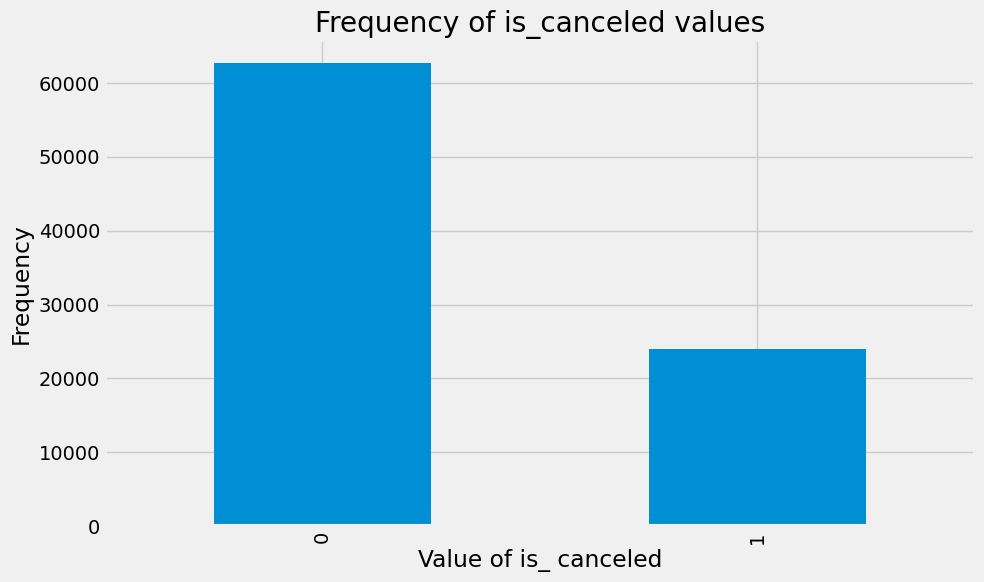

In [23]:
plt.figure(figsize=(10, 6))
canceled_frequency.plot(kind='bar')

plt.xlabel ('Value of is_ canceled')
plt.ylabel ('Frequency')
plt.title ('Frequency of is_canceled values')

plt.show()

### 1.2. Visualization of Hotels Frequency

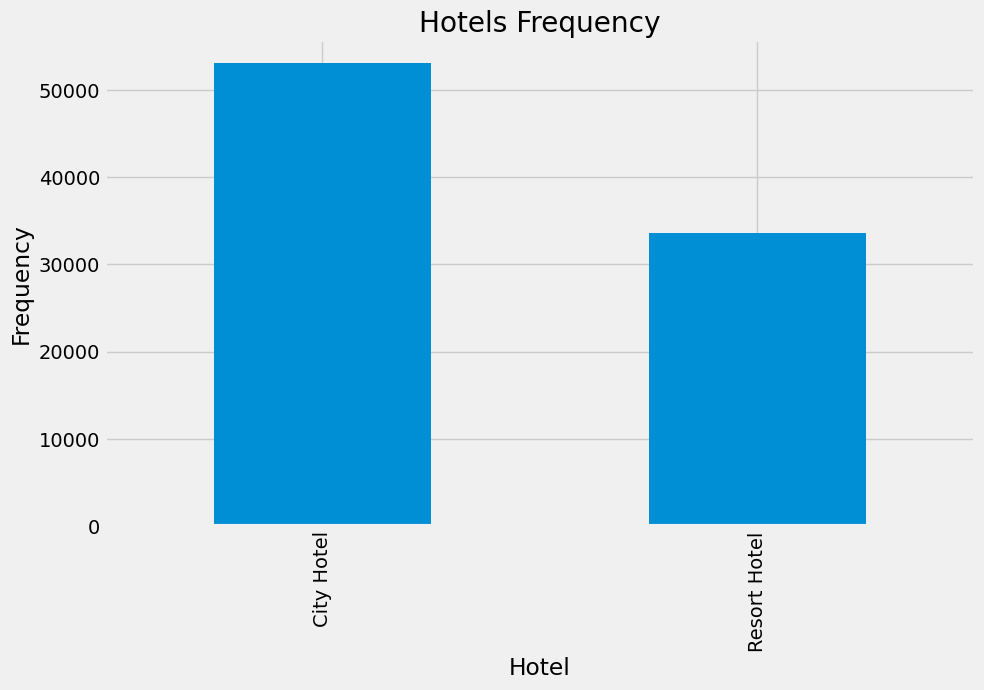

In [24]:
plt.figure(figsize=(10, 6))
hotel_frequency.plot(kind='bar')

plt.xlabel('Hotel')
plt.ylabel('Frequency')
plt.title('Hotels Frequency')

plt.show()

### 1.3. Visualization of booking per month Frequency

<Figure size 1000x600 with 0 Axes>

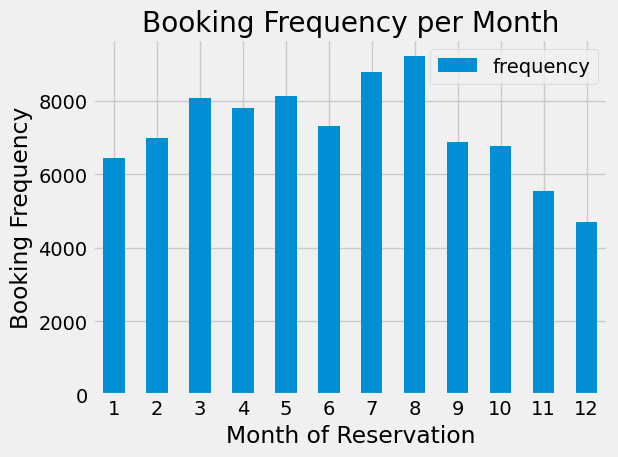

In [36]:
# Convert the 'reservation_status_date' column to datetime
df['reservation_status_date'] = pd.to_datetime(df['reservation_status_date'], errors='coerce')

# Check for conversion errors
invalid_dates = df['reservation_status_date'].isna().sum()
if invalid_dates > 0:
    print(f"There are {invalid_dates} invalid dates in 'reservation_status_date' column")

# Proceed if no invalid dates
if invalid_dates == 0:
    # Extract the month from the column 'reservation_status_date'
    df['month_of_reservation'] = df['reservation_status_date'].dt.month

    # Group by month and count the number of bookings for each month
    monthly_reservations = df.groupby('month_of_reservation').size().reset_index(name='frequency')

    # Bar graph
    plt.figure(figsize=(10, 6))
    monthly_reservations.plot(x='month_of_reservation', y='frequency', kind='bar')

    plt.xlabel('Month of Reservation')
    plt.ylabel('Booking Frequency')
    plt.title('Booking Frequency per Month')

    plt.xticks(rotation=0)
    plt.tight_layout()
    plt.show()
else:
    print("Fix the invalid dates in 'reservation_status_date' column before proceeding.")

### 1.4. Number of cancelled reservations

In [27]:
# Calculate the total number of guests and the number of canceled guests
total_guests = df.shape[0]
canceled_guests = df[df['is_canceled'] == 1].shape[0]

# Créer un diagramme à secteurs
fig = px.pie(values=[total_guests - canceled_guests, canceled_guests],
            names=['Non-canceled guests', 'Canceled guests'],
            title='Proportion of cancelled guests',
            color_discrete_sequence=px.colors.sequential.RdBu)
fig.show()

### 2.1. histogramme pour la colonne departure_date

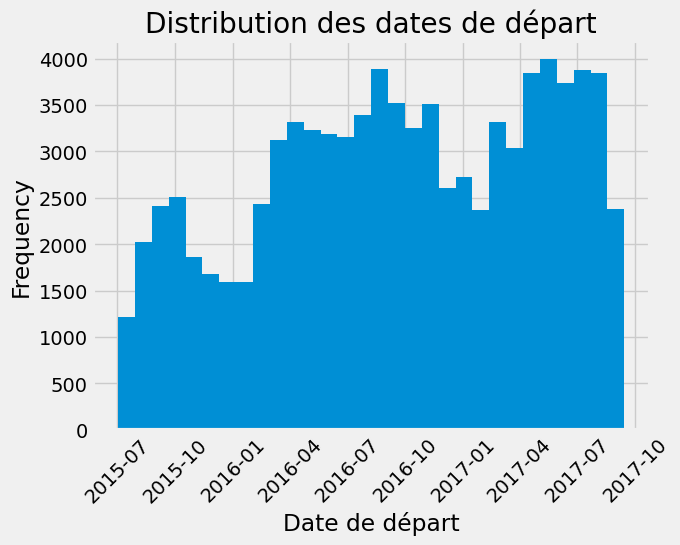

In [28]:
# Créer un histogramme pour la colonne departure_date
df['departure_date'].hist(bins=30)
plt.xlabel('Date de départ')
plt.ylabel('Frequency')
plt.title('Distribution des dates de départ')
plt.xticks(rotation=45)

plt.show()

###  2.2. histogramme pour la colonne date_arrive

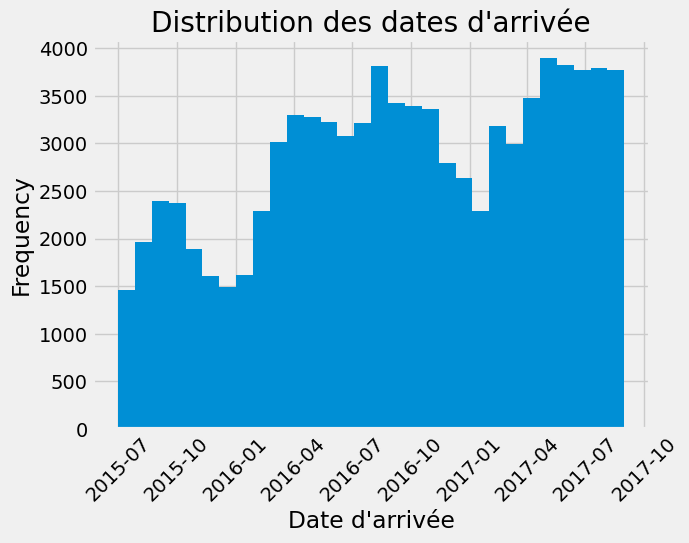

In [29]:
# Créer un histogramme pour la colonne date_arrive
df['date_arrive'].hist(bins=30)
plt.xlabel('Date d\'arrivée')
plt.ylabel('Frequency')
plt.title('Distribution des dates d\'arrivée')
plt.xticks(rotation=45)

plt.show()

### 3.1. Analysis of Canceled and Non-Canceled Reservations By Season

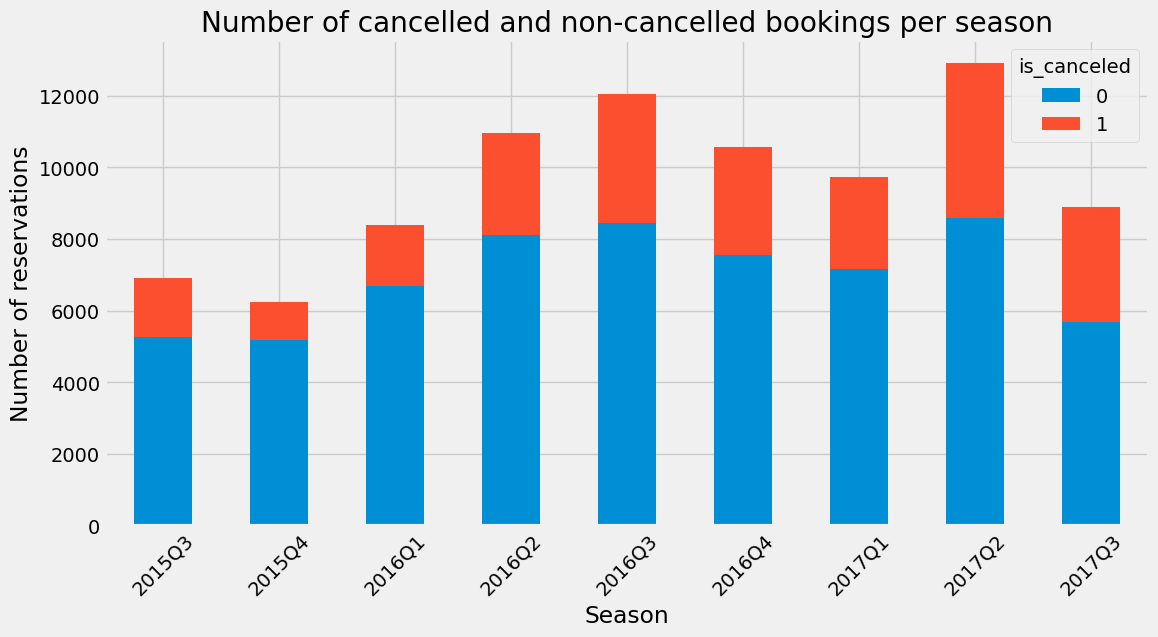

In [13]:
# Convert the date column to datetime if necessary
df['date_arrive'] = pd.to_datetime(df['date_arrive'])

# # Extract the season from the 'date_arrive' column
df['season'] = df['date_arrive'].dt.to_period('Q')

# Group by 'season' and 'is_canceled', then count the number of reservations
grouped_data = df.groupby(['season', 'is_canceled']).size().unstack(fill_value=0)

# Visualisation
grouped_data.plot(kind='bar', stacked=True, figsize=(12, 6))
plt.title('Number of cancelled and non-cancelled bookings per season')
plt.xlabel('Season')
plt.ylabel('Number of reservations')
plt.xticks(rotation=45)  
plt.show()

### 3.2. Analysis of Bookings by Type of Customer and by season

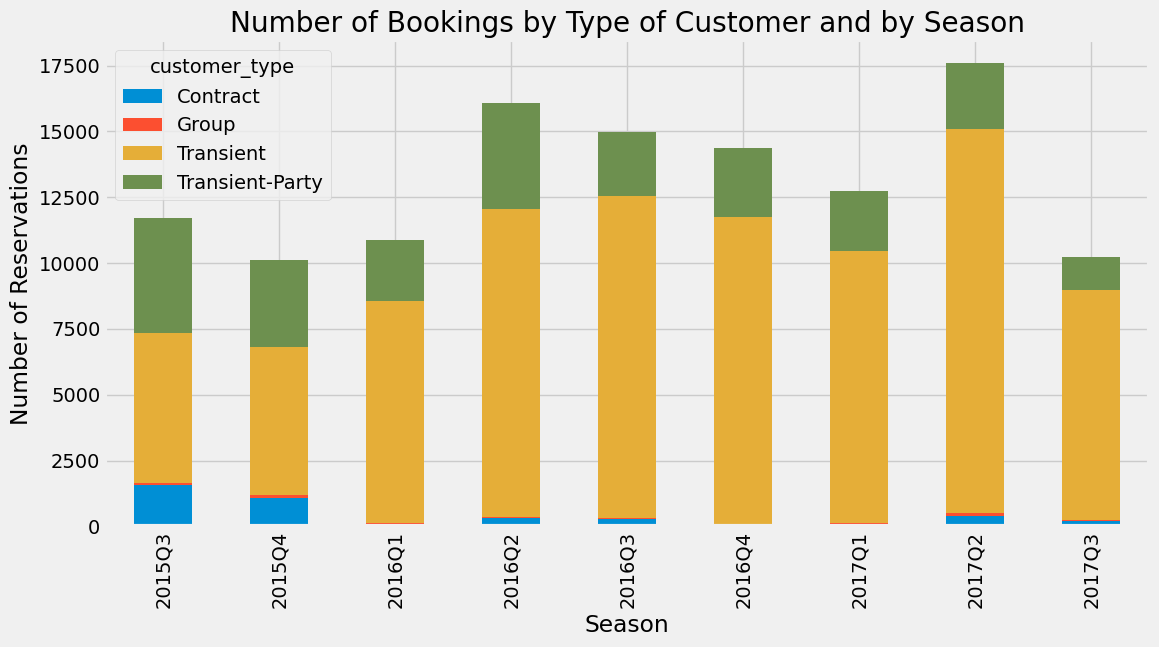

In [6]:
df['date_arrive'] = pd.to_datetime(df['date_arrive'])

# # Extract the season from the 'date_arrive' column
df['season'] = df['date_arrive'].dt.to_period('Q')

# Group by 'season' and 'customer_type', then count the number of reservations
grouped_data = df.groupby(['season', 'customer_type']).size().unstack(fill_value=0)

grouped_data.plot(kind='bar', stacked=True, figsize=(12, 6))
plt.title('Number of Bookings by Type of Customer and by Season')
plt.xlabel('Season')
plt.ylabel('Number of Reservations')
plt.show()

### 3.3. Analysis of Bookings by Type of Customer

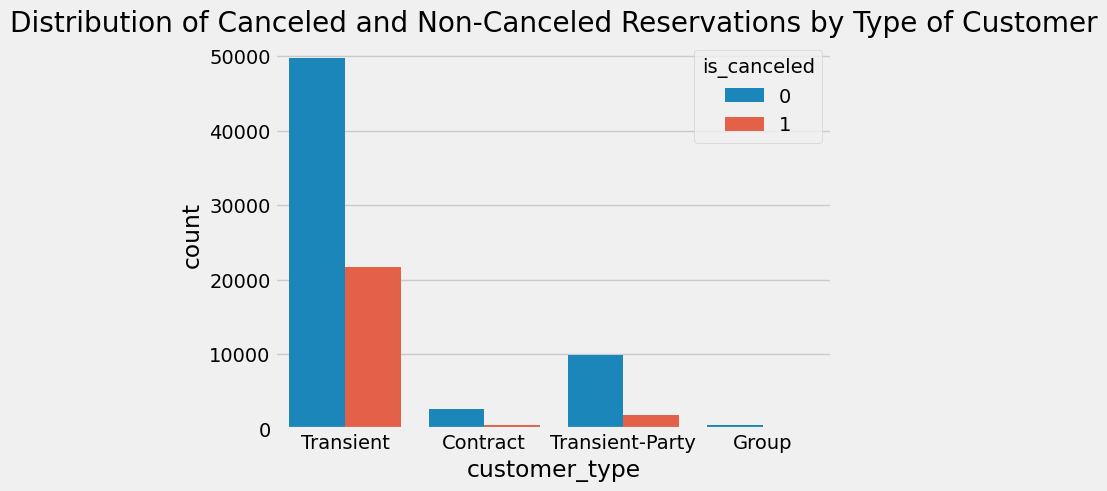

In [32]:
# Create a stacked bar chart for canceled and non-canceled reservations by customer type
sns.countplot(x='customer_type', hue='is_canceled', data=df)
plt.title('Distribution of Canceled and Non-Canceled Reservations by Type of Customer')
plt.show()

### 3.4. Analysis of the ADR Mean per Hotel

In [33]:
# Calculate ADR "Average Daily Rate" for each hotel
adr_mean_by_hotel = df.groupby('hotel')['adr'].mean()

print(adr_mean_by_hotel, "\n")

hotel
City Hotel      111.756553
Resort Hotel    100.120995
Name: adr, dtype: float64 



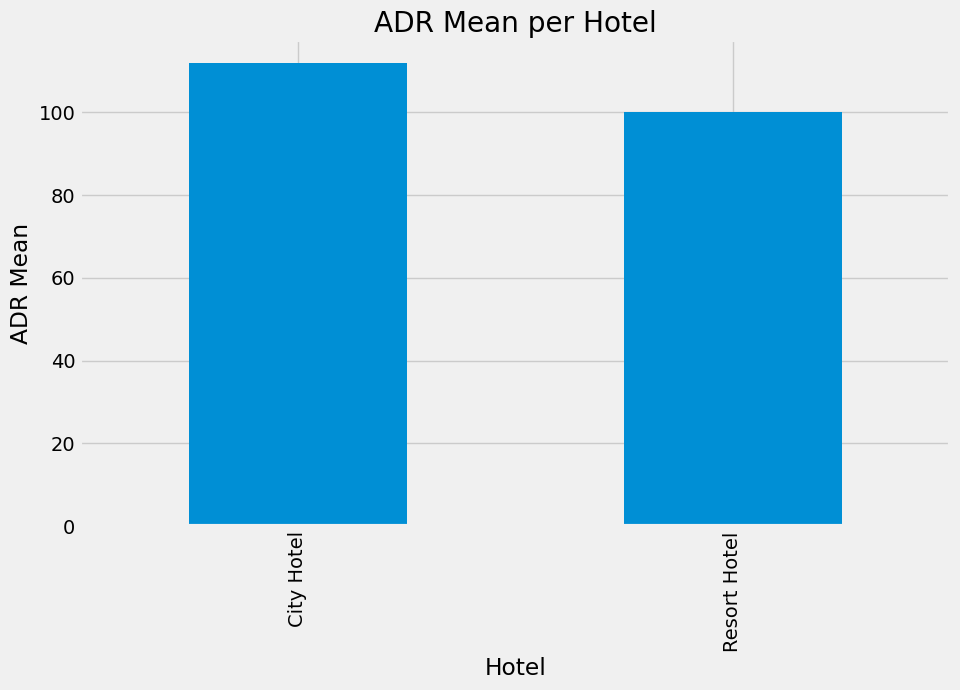

In [34]:
adr_mean_by_hotel.plot(kind='bar', figsize=(10, 6))
plt.title('ADR Mean per Hotel')
plt.xlabel('Hotel')
plt.ylabel('ADR Mean')
plt.show()

## 4.1 Correlation matrix

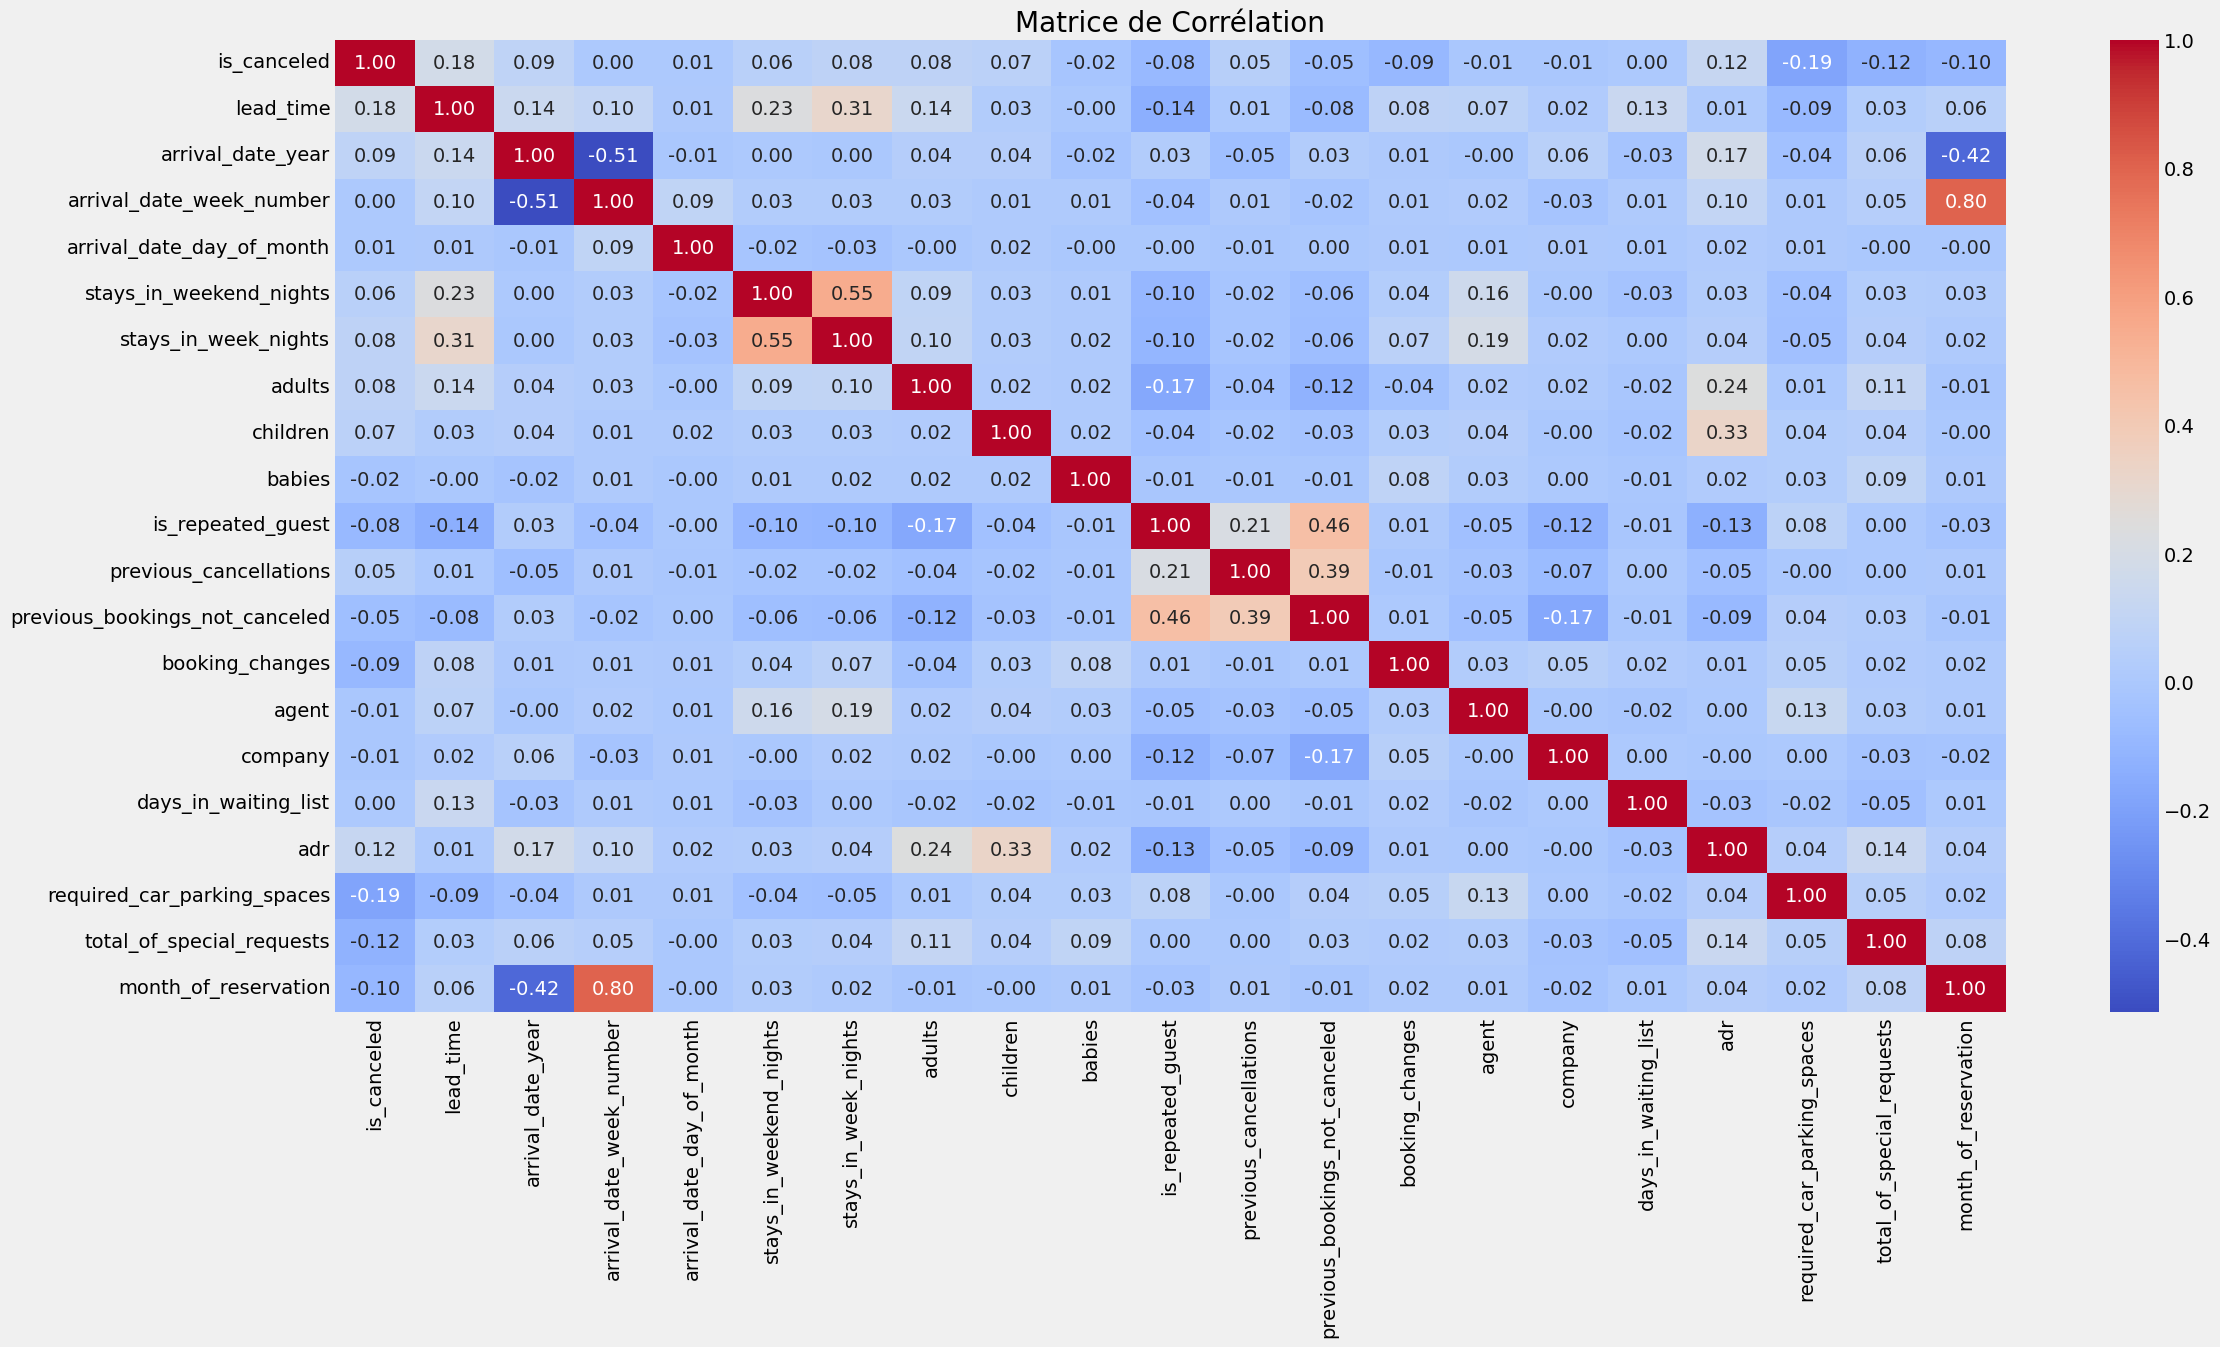

In [35]:
# La matrice de corrélation permet de déterminer les relations linéaires entre les variables,
# Exclure les colonnes non numériques du calcul de corrélation
numeric_cols = df.select_dtypes(include=[np.number]).columns
df_numeric = df[numeric_cols]

# Calculer la matrice de corrélation
correlation_matrix = df_numeric.corr()

# Tracer la matrice de corrélation
plt.figure(figsize=(24, 12))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Matrice de Corrélation')
plt.show()

### 4.2. Analysis of the Correlation between ASP and Numerical Variables

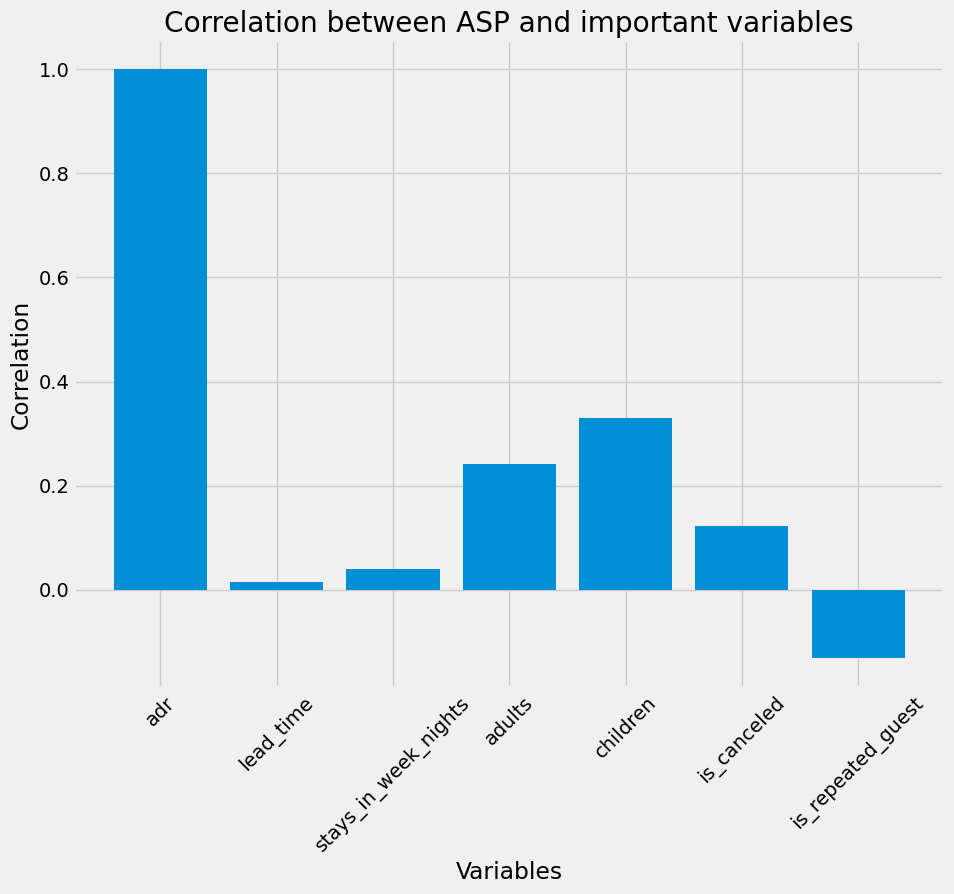

In [36]:
# Extraire la corrélation entre ASP et les variables importants
asp_correlation = correlation_matrix['adr']

important_columns = ['adr', 'lead_time', 'stays_in_week_nights', 'adults', 'children', 'is_canceled', 'is_repeated_guest']
filtered_important_correlation = asp_correlation[important_columns]

plt.figure(figsize=(10, 8))
plt.bar(filtered_important_correlation.index, filtered_important_correlation.values)
plt.title('Correlation between ASP and important variables')
plt.xlabel('Variables')
plt.ylabel('Correlation')

plt.xticks(rotation=45)

plt.show()

## 5. Analysis of variable relationships

### 5.1. The number of nights per hotel type

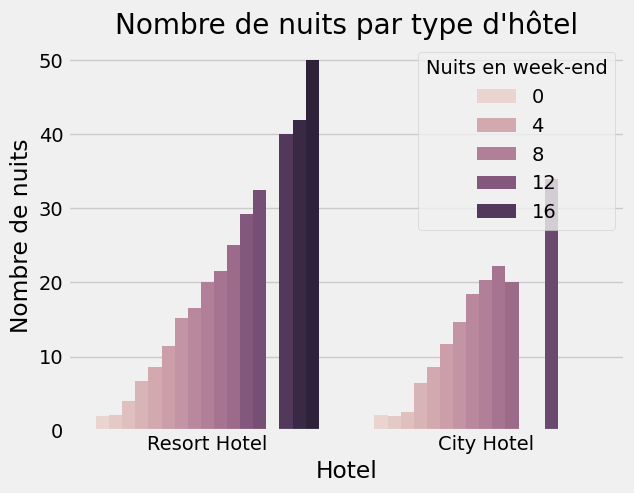

In [37]:
# Diagramme en barres empilées
sns.barplot(data=df, x='hotel', y='stays_in_week_nights', hue='stays_in_weekend_nights', errorbar=None)
plt.title('Nombre de nuits par type d\'hôtel')
plt.xlabel('Hotel')
plt.ylabel('Nombre de nuits')
plt.legend(title='Nuits en week-end')
plt.show()

### 5.2. Comparative Analysis of ADR by Room Type and Hotel

In [38]:
# Les deux hôtels proposent différents types de chambres et différents arrangements de repas
# Les facteurs saisonniers sont également importants, ce qui entraîne des variations importantes des prix.
data = df[df['is_canceled'] == 0]

px.box(data_frame = data, x = 'reserved_room_type', y = 'adr', color = 'hotel', template = 'plotly_dark')

### 5.3. Comparative analysis between the price per night of each hotel

In [37]:
data_resort = df[(df['hotel'] == 'Resort Hotel') & (df['is_canceled'] == 0)]
data_city = df[(df['hotel'] == 'City Hotel') & (df['is_canceled'] == 0)]

In [38]:
resort_hotel = data_resort.groupby(['arrival_date_month'])['adr'].mean().reset_index()
city_hotel=data_city.groupby(['arrival_date_month'])['adr'].mean().reset_index()

final_hotel = resort_hotel.merge(city_hotel, on = 'arrival_date_month')
final_hotel.columns = ['Month', 'price_for_resort_hotel', 'price_for_city_hotel']

# Fonction pour trier les mois
def sort_month(df, column_name):
    return sd.Sort_Dataframeby_Month(df, column_name)

final__hotel_prices = sort_month(final_hotel, 'Month')
final__hotel_prices

Month  price_for_resort_hotel  price_for_city_hotel
0     January               49.419861             84.063949
1    February               54.151849             89.095640
2       March               57.822574             91.836402
3       April               77.484691            114.561728
4         May               78.919819            125.237006
5        June              110.344661            121.021817
6        July              152.842188            120.572661
7      August              184.029619            123.239221
8   September               99.279047            117.492830
9     October               63.760548            106.875107
10   November               49.842510             89.338057
11   December               66.035417             91.448972

In [41]:
plt.figure(figsize = (17, 8))

px.line(final__hotel_prices, x = 'Month', y = ['price_for_resort_hotel','price_for_city_hotel'],
        title = 'Room price per night over the Months', template = 'plotly_dark')

<Figure size 1700x800 with 0 Axes>

### Conclusion : 
### Ce graphique montre clairement que les prix des Hotels Resort sont beaucoup plus élevés pendant l'été et que les prix des city Hotels varient moins et sont les plus chers au printemps et en automne.

### 5.4. Comparative analysis between the number of guests of each hotel per month

In [39]:
resort_guests = data_resort['arrival_date_month'].value_counts().reset_index()
resort_guests.columns=['month','no of guests']

city_guests = data_city['arrival_date_month'].value_counts().reset_index()
city_guests.columns=['month','no of guests']

final_guests_month = resort_guests.merge(city_guests,on='month')
final_guests_month.columns=['month','no of guests in resort hotel','no of guest in city hotel']
final_guests_month = sort_month(final_guests_month,'month')

final_guests_month

month  no of guests in resort hotel  no of guest in city hotel
0     January                          1659                       1945
1    February                          2033                       2592
2       March                          2164                       3449
3       April                          2151                       3316
4         May                          2212                       3644
5        June                          1903                       3467
6        July                          2975                       3818
7      August                          3120                       4452
8   September                          1867                       3152
9     October                          2170                       3031
10   November                          1713                       2151
11   December                          1665                       2004

In [43]:
px.line(final_guests_month, x = 'month', y = ['no of guests in resort hotel','no of guest in city hotel'],
        title='Total no of guests per Months', template = 'plotly_dark')

### 5.5. Comparative analysis between the price per night per season and the type of room in each hotel

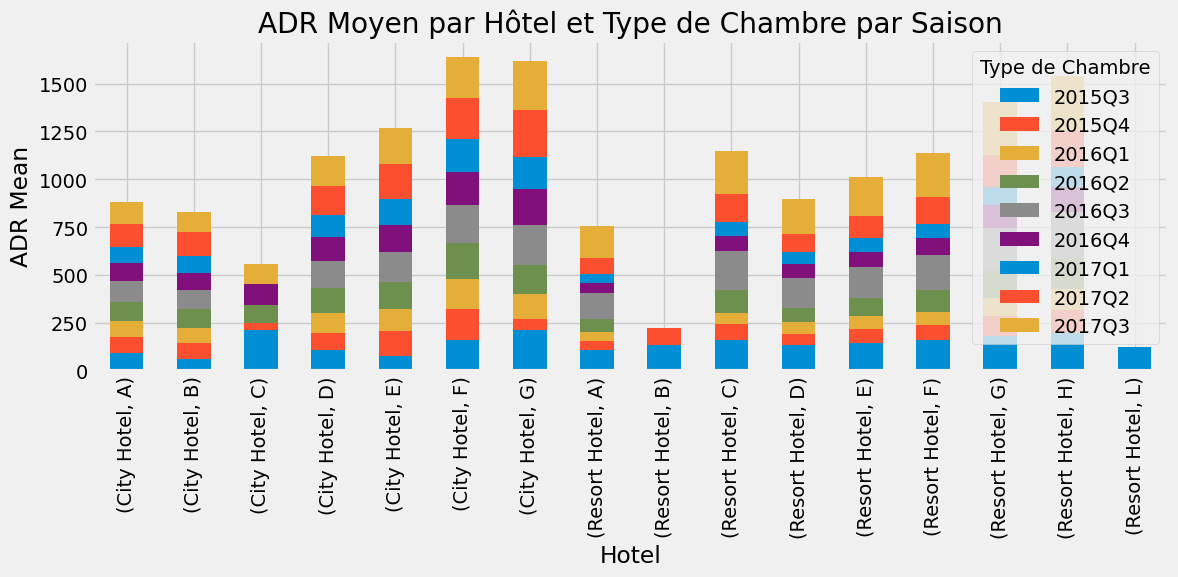

In [44]:
# Regroupement par hôtel, type de chambre et saison, puis calcul de l'ADR moyen
adr_mean_by_hotel_chamber_season = df.groupby(['hotel', 'reserved_room_type', 'season'])['adr'].mean()

adr_mean_by_hotel_chamber_season.unstack(level=-1).plot(kind='bar', stacked=True, figsize=(12, 6))
plt.title('ADR Moyen par Hôtel et Type de Chambre par Saison')
plt.xlabel('Hotel')
plt.ylabel('ADR Mean')
plt.xticks(rotation=90) 
plt.legend(title='Type de Chambre')
plt.tight_layout()
plt.show()

### Note: 
### hotels have different room types and dining arrangements, as well as important seasonal factors that influence prices. This means that the average ADR can vary significantly depending on room type and time of year, which could explain why the overall average ADR for one hotel may be lower than that of another.

### 5.6. Analysis of the Distribution of Nights Spent by Hotel Type

In [40]:
# Assuming df is your original DataFrame and you want to calculate total nights and number of stays

# Create a new column 'total_nights' which is the sum of 'stays_in_weekend_nights' and 'stays_in_week_nights'
df['total_nights'] = df['stays_in_weekend_nights'] + df['stays_in_week_nights']

# Group by 'hotel' and 'total_nights', and count the number of stays
stay = df.groupby(['hotel', 'total_nights']).size().reset_index(name='Number of stays')

# Plotting the bar chart
fig = px.bar(
    data_frame=stay,
    x='total_nights',
    y='Number of stays',
    color='hotel',
    barmode='group',
    template='plotly_dark'
)

fig.show()

### 5.7. Number of nights per type of guest

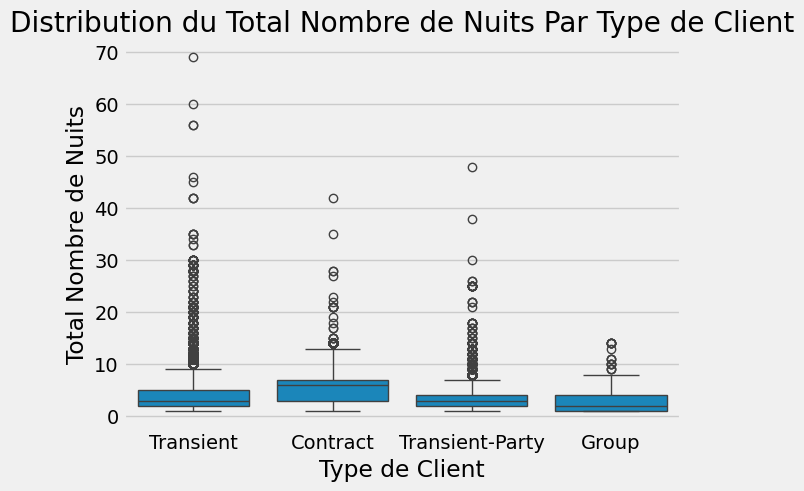

In [46]:
# Création du diagramme à barres avec des moustaches
sns.boxplot(x='customer_type', y='total_nights', data=df)

plt.title('Distribution du Total Nombre de Nuits Par Type de Client')
plt.xlabel('Type de Client')
plt.ylabel('Total Nombre de Nuits')

plt.show()

## 6. Cross-analysis

### 6.1. Cross-analysis between the type of hotel and the type of customer

In [51]:
# Effectuer une analyse croisée entre le type d'hôtel et le type de client
cross_tab = pd.crosstab(index=df['hotel'], columns=df['customer_type'], values=df['stays_in_week_nights'], aggfunc='sum')

# Afficher la table croisée
print("Analyse croisée entre le type d'hôtel et le type de client (nombre total de nuits en semaine):")
cross_tab

Analyse croisée entre le type d'hôtel et le type de client (nombre total de nuits en semaine):


customer_type  Contract  Group  Transient  Transient-Party
hotel                                                     
City Hotel         3441    479     102634            14443
Resort Hotel      10213    637      82918            14120

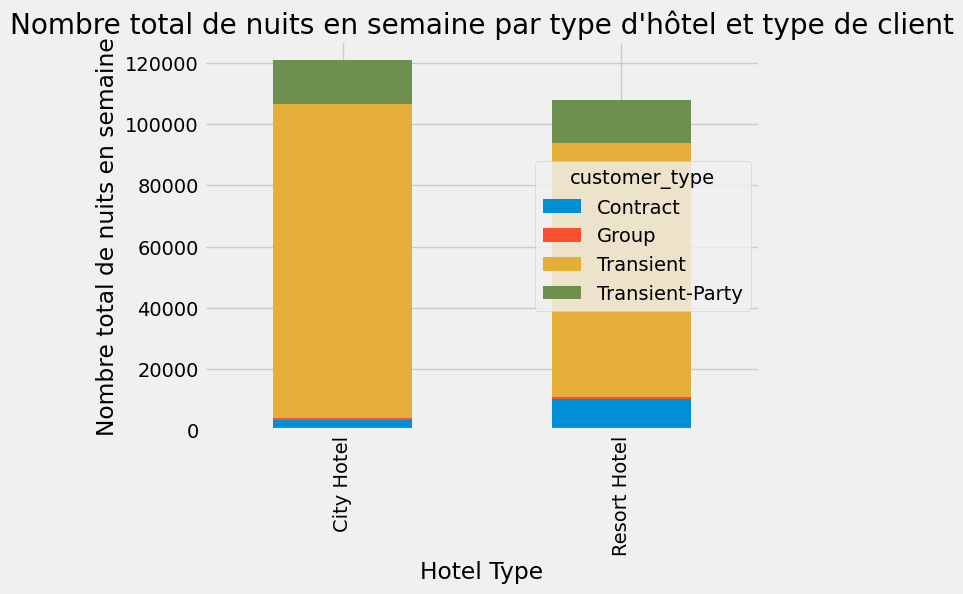

In [52]:
cross_tab.plot(kind='bar', stacked=True)
plt.title('Nombre total de nuits en semaine par type d\'hôtel et type de client')
plt.xlabel('Hotel Type')
plt.ylabel('Nombre total de nuits en semaine')
plt.show()

### 6.2. Cross-analysis of Bookings by Hotel and Region

In [53]:
# Effectuer une analyse croisée entre le type d'hôtel et le pays
cross_tab_RegHotel = pd.crosstab(index=df['region'], columns=df['hotel'])

# Afficher la table croisée
print("Analyse croisée entre le type d'hôtel et les regions :")
print(cross_tab_RegHotel)

Analyse croisée entre le type d'hôtel et les regions :
hotel          City Hotel  Resort Hotel
region                                 
Africa                845           168
Asia                 2019           292
Europe              45759         30969
North America        1530           486
Oceania               342           102
South America        1928           511


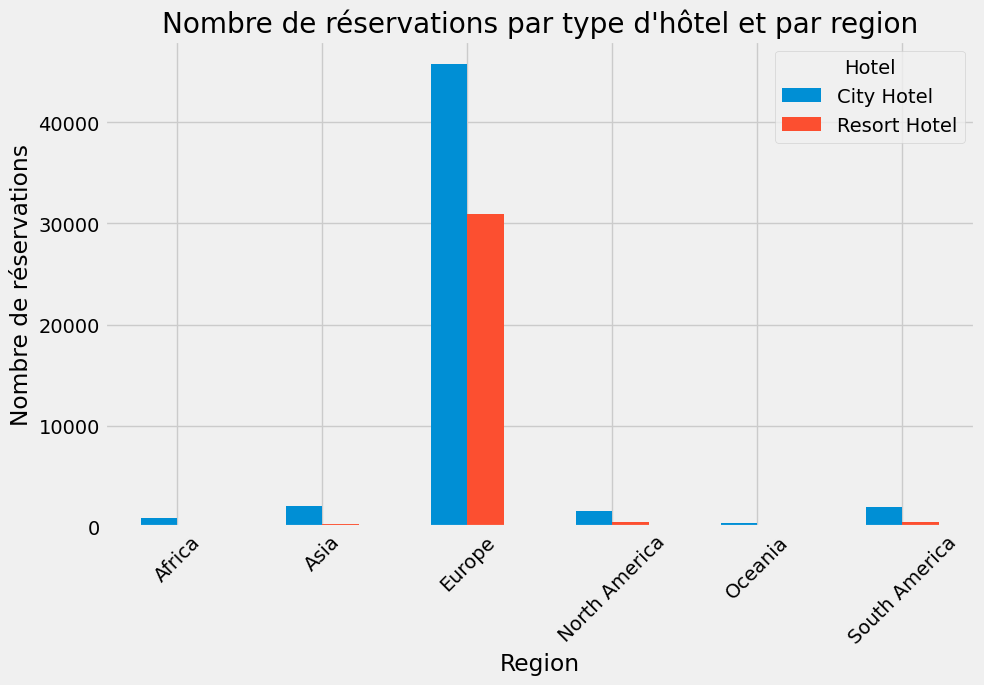

In [54]:
# Diagramme en barres groupées
cross_tab_RegHotel.plot(kind='bar', figsize=(10, 6))
plt.title('Nombre de réservations par type d\'hôtel et par region')
plt.xlabel('Region')
plt.ylabel('Nombre de réservations')
plt.xticks(rotation=45)
plt.legend(title='Hotel')
plt.show()

### 6.3. Cross-analysis of the distribution of Arrival and Departure Dates by Hotel and Year

In [55]:
data_grouped = df.groupby(['arrival_date_year', 'hotel']).size().reset_index(name='counts')

px.line(data_frame=data_grouped, x='arrival_date_year', y='counts', color='hotel',
              title='Histogramme : Type d\'Hôtel en Fonction de l\'Année', template = 'plotly_dark')

# III Data preparation

### .1. Removing unnecessary columns

In [14]:
useless_col = ['days_in_waiting_list', 'arrival_date_year', 'date_arrive', 'departure_date', 'assigned_room_type', 'booking_changes','reservation_status', 'country', 'season', 'region']
df.drop(useless_col, axis = 1, inplace = True) 

### .2. Creation of numeric and categorical dataframes

In [15]:
categ_cols = [col for col in df.columns if df[col].dtype == 'O']
categ_cols

['hotel',
 'arrival_date_month',
 'meal',
 'market_segment',
 'distribution_channel',
 'reserved_room_type',
 'deposit_type',
 'customer_type',
 'reservation_status_date']

In [16]:
categ_df = df[categ_cols]
categ_df

hotel arrival_date_month meal market_segment  \
2       Resort Hotel               July   BB         Direct   
3       Resort Hotel               July   BB      Corporate   
4       Resort Hotel               July   BB      Online TA   
6       Resort Hotel               July   BB         Direct   
7       Resort Hotel               July   FB         Direct   
...              ...                ...  ...            ...   
119385    City Hotel             August   BB  Offline TA/TO   
119386    City Hotel             August   BB      Online TA   
119387    City Hotel             August   BB      Online TA   
119388    City Hotel             August   BB      Online TA   
119389    City Hotel             August   HB      Online TA   

       distribution_channel reserved_room_type deposit_type customer_type  \
2                    Direct                  A   No Deposit     Transient   
3                 Corporate                  A   No Deposit     Transient   
4                     TA/TO                  A   No Deposit     Transient   
6                    Direct                  C   No Deposit     Transient   
7                    Direct                  C   No Deposit     Transient   
...                     ...                ...          ...           ...   
119385                TA/TO                  A   No Deposit     Transient   
119386                TA/TO                  E   No Deposit     Transient   
119387                TA/TO                  D   No Deposit     Transient   
119388                TA/TO                  A   No Deposit     Transient   
119389                TA/TO                  A   No Deposit     Transient   

       reservation_status_date  
2                   2015-07-02  
3                   2015-07-02  
4                   2015-07-03  
6                   2015-07-03  
7                   2015-07-03  
...                        ...  
119385              2017-09-06  
119386              2017-09-07  
119387              2017-09-07  
119388              2017-09-07  
119389              2017-09-07  

[86639 rows x 9 columns]

In [17]:
categ_df['reservation_status_date'] = pd.to_datetime(categ_df['reservation_status_date'])
categ_df['year'] = categ_df['reservation_status_date'].dt.year
categ_df['month'] = categ_df['reservation_status_date'].dt.month
categ_df['day'] = categ_df['reservation_status_date'].dt.day

C:\Users\Mossab Weda\AppData\Local\Temp\ipykernel_18108\877810468.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  categ_df['reservation_status_date'] = pd.to_datetime(categ_df['reservation_status_date'])
C:\Users\Mossab Weda\AppData\Local\Temp\ipykernel_18108\877810468.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  categ_df['year'] = categ_df['reservation_status_date'].dt.year
C:\Users\Mossab Weda\AppData\Local\Temp\ipykernel_18108\877810468.py:3: SettingWithCopyWarning: 
A value is trying to be se

In [18]:
categ_df.drop(['reservation_status_date','arrival_date_month'] , axis = 1, inplace = True)
categ_df.head()

C:\Users\Mossab Weda\AppData\Local\Temp\ipykernel_18108\2897893294.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  categ_df.drop(['reservation_status_date','arrival_date_month'] , axis = 1, inplace = True)


hotel meal market_segment distribution_channel reserved_room_type  \
2  Resort Hotel   BB         Direct               Direct                  A   
3  Resort Hotel   BB      Corporate            Corporate                  A   
4  Resort Hotel   BB      Online TA                TA/TO                  A   
6  Resort Hotel   BB         Direct               Direct                  C   
7  Resort Hotel   FB         Direct               Direct                  C   

  deposit_type customer_type  year  month  day  
2   No Deposit     Transient  2015      7    2  
3   No Deposit     Transient  2015      7    2  
4   No Deposit     Transient  2015      7    3  
6   No Deposit     Transient  2015      7    3  
7   No Deposit     Transient  2015      7    3

In [19]:
# printing unique values of each column
for col in categ_df.columns:
    print(f"{col}: \n{categ_df[col].unique()}\n")

hotel: 
['Resort Hotel' 'City Hotel']

meal: 
['BB' 'FB' 'HB' 'SC' 'Undefined']

market_segment: 
['Direct' 'Corporate' 'Online TA' 'Offline TA/TO' 'Complementary' 'Groups'
 'Undefined' 'Aviation']

distribution_channel: 
['Direct' 'Corporate' 'TA/TO' 'Undefined' 'GDS']

reserved_room_type: 
['A' 'C' 'D' 'E' 'G' 'F' 'H' 'L' 'B']

deposit_type: 
['No Deposit' 'Refundable' 'Non Refund']

customer_type: 
['Transient' 'Contract' 'Transient-Party' 'Group']

year: 
[2015 2014 2016 2017]

month: 
[ 7  5  4  6  3  8  9  1 11 10 12  2]

day: 
[ 2  3  6 22 23  5  7  1  8 11 15 16 29 19 18  9 13  4 12 26 17 10 20 14
 30 28 25 21 27 24 31]



In [20]:
# encoding categorical variables

categ_df['hotel'] = categ_df['hotel'].map({'Resort Hotel' : 0, 'City Hotel' : 1})

categ_df['meal'] = categ_df['meal'].map({'BB' : 0, 'FB': 1, 'HB': 2, 'SC': 3, 'Undefined': 4})

categ_df['market_segment'] = categ_df['market_segment'].map({'Direct': 0, 'Corporate': 1, 'Online TA': 2, 'Offline TA/TO': 3,'Complementary': 4, 'Groups': 5, 'Undefined': 6, 
                                                             'Aviation': 7})

categ_df['distribution_channel'] = categ_df['distribution_channel'].map({'Direct': 0, 'Corporate': 1, 'TA/TO': 2, 'Undefined': 3,'GDS': 4})

categ_df['reserved_room_type'] = categ_df['reserved_room_type'].map({'C': 0, 'A': 1, 'D': 2, 'E': 3, 'G': 4, 'F': 5, 'H': 6,'L': 7, 'B': 8})

categ_df['deposit_type'] = categ_df['deposit_type'].map({'No Deposit': 0, 'Refundable': 1, 'Non Refund': 3})

categ_df['customer_type'] = categ_df['customer_type'].map({'Transient': 0, 'Contract': 1, 'Transient-Party': 2, 'Group': 3})

categ_df['year'] = categ_df['year'].map({2015: 0, 2014: 1, 2016: 2, 2017: 3})

categ_df.head()

C:\Users\Mossab Weda\AppData\Local\Temp\ipykernel_18108\1591363276.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  categ_df['hotel'] = categ_df['hotel'].map({'Resort Hotel' : 0, 'City Hotel' : 1})
C:\Users\Mossab Weda\AppData\Local\Temp\ipykernel_18108\1591363276.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  categ_df['meal'] = categ_df['meal'].map({'BB' : 0, 'FB': 1, 'HB': 2, 'SC': 3, 'Undefined': 4})
C:\Users\Mossab Weda\AppData\Local\Temp\ipykernel_18108\1591363276.py:7: SettingWithCopyWarning: 

hotel  meal  market_segment  distribution_channel  reserved_room_type  \
2      0     0               0                     0                   1   
3      0     0               1                     1                   1   
4      0     0               2                     2                   1   
6      0     0               0                     0                   0   
7      0     1               0                     0                   0   

   deposit_type  customer_type  year  month  day  
2             0              0     0      7    2  
3             0              0     0      7    2  
4             0              0     0      7    3  
6             0              0     0      7    3  
7             0              0     0      7    3

In [21]:
numeric_df = df.drop(columns = categ_cols, axis = 1)
numeric_df.drop('is_canceled', axis = 1, inplace = True)
numeric_df

lead_time  arrival_date_week_number  arrival_date_day_of_month  \
2               7                        27                          1   
3              13                        27                          1   
4              14                        27                          1   
6               0                        27                          1   
7               9                        27                          1   
...           ...                       ...                        ...   
119385         23                        35                         30   
119386        102                        35                         31   
119387         34                        35                         31   
119388        109                        35                         31   
119389        205                        35                         29   

        stays_in_weekend_nights  stays_in_week_nights  adults  children  \
2                             0                     1       1       0.0   
3                             0                     1       1       0.0   
4                             0                     2       2       0.0   
6                             0                     2       2       0.0   
7                             0                     2       2       0.0   
...                         ...                   ...     ...       ...   
119385                        2                     5       2       0.0   
119386                        2                     5       3       0.0   
119387                        2                     5       2       0.0   
119388                        2                     5       2       0.0   
119389                        2                     7       2       0.0   

        babies  is_repeated_guest  previous_cancellations  \
2            0                  0                       0   
3            0                  0                       0   
4            0                  0                       0   
6            0                  0                       0   
7            0                  0                       0   
...        ...                ...                     ...   
119385       0                  0                       0   
119386       0                  0                       0   
119387       0                  0                       0   
119388       0                  0                       0   
119389       0                  0                       0   

        previous_bookings_not_canceled  agent  company     adr  \
2                                    0   14.0    169.0   75.00   
3                                    0  304.0    169.0   75.00   
4                                    0  240.0    169.0   98.00   
6                                    0   14.0    169.0  107.00   
7                                    0  303.0    169.0  103.00   
...                                ...    ...      ...     ...   
119385                               0  394.0    169.0   96.14   
119386                               0    9.0    169.0  225.43   
119387                               0    9.0    169.0  157.71   
119388                               0   89.0    169.0  104.40   
119389                               0    9.0    169.0  151.20   

        required_car_parking_spaces  total_of_special_requests  
2                                 0                          0  
3                                 0                          0  
4                                 0                          1  
6                                 0                          0  
7                                 0                          1  
...                             ...                        ...  
119385                            0                          0  
119386                            0                          2  
119387                            0                          4  
119388                            0       

In [22]:
# Remplacer les valeurs négatives par zéro
numeric_df.replace([np.inf, -np.inf], np.nan, inplace=True)
numeric_df.fillna(0, inplace=True)

numeric_df['lead_time'] = np.log(numeric_df['lead_time'] + 1)
numeric_df['arrival_date_week_number'] = np.log(numeric_df['arrival_date_week_number'] + 1)
numeric_df['arrival_date_day_of_month'] = np.log(numeric_df['arrival_date_day_of_month'] + 1)
numeric_df['agent'] = np.log(numeric_df['agent'] + 1)
numeric_df['company'] = np.log(numeric_df['company'] + 1)
numeric_df['adr'] = np.log(numeric_df['adr'] + 1)

c:\Users\Mossab Weda\AppData\Local\Programs\Python\Python312\Lib\site-packages\pandas\core\arraylike.py:399: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


In [23]:
numeric_df['adr'] = numeric_df['adr'].fillna(value = numeric_df['adr'].mean())
numeric_df.head()

lead_time  arrival_date_week_number  arrival_date_day_of_month  \
2   2.079442                  3.332205                   0.693147   
3   2.639057                  3.332205                   0.693147   
4   2.708050                  3.332205                   0.693147   
6   0.000000                  3.332205                   0.693147   
7   2.302585                  3.332205                   0.693147   

   stays_in_weekend_nights  stays_in_week_nights  adults  children  babies  \
2                        0                     1       1       0.0       0   
3                        0                     1       1       0.0       0   
4                        0                     2       2       0.0       0   
6                        0                     2       2       0.0       0   
7                        0                     2       2       0.0       0   

   is_repeated_guest  previous_cancellations  previous_bookings_not_canceled  \
2                  0                       0                               0   
3                  0                       0                               0   
4                  0                       0                               0   
6                  0                       0                               0   
7                  0                       0                               0   

      agent   company       adr  required_car_parking_spaces  \
2  2.708050  5.135798  4.330733                            0   
3  5.720312  5.135798  4.330733                            0   
4  5.484797  5.135798  4.595120                            0   
6  2.708050  5.135798  4.682131                            0   
7  5.717028  5.135798  4.644391                            0   

   total_of_special_requests  
2                          0  
3                          0  
4                          1  
6                          0  
7                          1

In [24]:
X = pd.concat([categ_df, numeric_df], axis = 1)
y = df['is_canceled']

In [25]:
X.shape, y.shape

((86639, 26), (86639,))

### .3. Decompose the data set into a training set and a test set

In [26]:
# 30% Test 70% Training
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.30)

In [27]:
X_train

hotel  meal  market_segment  distribution_channel  reserved_room_type  \
68100       1     3               2                     2                   1   
83098       1     0               3                     2                   1   
11088       0     2               2                     2                   4   
11920       0     0               2                     2                   1   
117164      1     2               3                     2                   1   
...       ...   ...             ...                   ...                 ...   
12566       0     0               1                     1                   2   
118883      1     2               3                     2                   1   
102638      1     0               2                     2                   1   
105267      1     0               0                     0                   1   
84230       1     3               2                     2                   1   

        deposit_type  customer_type  year  month  day  lead_time  \
68100              0              0     3      5    8   2.197225   
83098              0              0     2      1   19   2.890372   
11088              0              0     3      1    8   5.433722   
11920              0              0     3      2    3   5.771441   
117164             0              0     3      7   31   5.247024   
...              ...            ...   ...    ...  ...        ...   
12566              0              0     3      5   12   4.025352   
118883             0              2     3      8   27   6.126869   
102638             0              0     2     12    4   4.094345   
105267             0              0     3      2    4   0.000000   
84230              0              0     2      2   21   3.135494   

        arrival_date_week_number  arrival_date_day_of_month  \
68100                   2.995732                   2.639057   
83098                   1.386294                   2.833213   
11088                   2.833213                   2.890372   
11920                   3.135494                   1.386294   
117164                  3.433987                   3.218876   
...                          ...                        ...   
12566                   3.332205                   1.609438   
118883                  3.555348                   3.258097   
102638                  3.912023                   1.098612   
105267                  1.791759                   3.465736   
84230                   2.197225                   2.995732   

        stays_in_weekend_nights  stays_in_week_nights  adults  children  \
68100                         0                     1       2       0.0   
83098                         2                     1       1       0.0   
11088                         1                     5       2       1.0   
11920                         2                     5       2       0.0   
117164                        2                     5       2       0.0   
...                         ...                   ...     ...       ...   
12566                         2                     8       2       0.0   
118883                        0                     2       2       0.0   
102638                        0                     2       2       0.0   
105267                        0                     4       2       0.0   
84230                         0                     2       2       0.0   

        babies  is_repeated_guest  previous_cancellations  \
68100        0                  0                       0   
83098        0                  0                       0   
11088        0                  0                       0   
11920        0                  0                       0   
117164       0                  0                       0   
...        ...                ...                     ...   
12566        0                  0                       0   
118883       0                  0                       0   
102638     

In [28]:
X_test

hotel  meal  market_segment  distribution_channel  reserved_room_type  \
23893       0     0               3                     2                   2   
69556       1     3               2                     2                   1   
91542       1     0               3                     4                   1   
81515       1     0               0                     0                   1   
117016      1     0               2                     2                   1   
...       ...   ...             ...                   ...                 ...   
32895       0     0               0                     0                   1   
1249        0     0               3                     2                   2   
83588       1     0               3                     2                   1   
7787        0     0               0                     0                   0   
86155       1     0               2                     2                   2   

        deposit_type  customer_type  year  month  day  lead_time  \
23893              0              0     2      5    7   4.553877   
69556              0              0     3      5    6   3.367296   
91542              0              0     2      6   23   2.772589   
81515              0              0     0     12   13   2.397895   
117016             0              2     3      7   29   5.332719   
...              ...            ...   ...    ...  ...        ...   
32895              0              0     3      2    9   0.000000   
1249               0              0     0      8   26   3.931826   
83588              0              0     2      2    8   4.077537   
7787               0              0     2      8   18   2.708050   
86155              0              0     2      3   28   2.639057   

        arrival_date_week_number  arrival_date_day_of_month  \
23893                   2.944439                   3.433987   
69556                   3.135494                   1.098612   
91542                   3.295837                   3.135494   
81515                   3.951244                   2.708050   
117016                  3.433987                   3.332205   
...                          ...                        ...   
32895                   1.945910                   2.197225   
1249                    3.555348                   3.091042   
83588                   1.945910                   1.386294   
7787                    3.583519                   3.295837   
86155                   2.639057                   3.258097   

        stays_in_weekend_nights  stays_in_week_nights  adults  children  \
23893                         2                     5       2       0.0   
69556                         0                     1       2       0.0   
91542                         0                     1       1       0.0   
81515                         1                     5       1       0.0   
117016                        0                     2       2       0.0   
...                         ...                   ...     ...       ...   
32895                         0                     1       1       0.0   
1249                          2                     3       2       0.0   
83588                         1                     4       2       0.0   
7787                          2                     5       2       1.0   
86155                         1                     2       3       0.0   

        babies  is_repeated_guest  previous_cancellations  \
23893        0                  0                       0   
69556        0                  0                       0   
91542        0                  0                       0   
81515        0                  0                       1   
117016       0                  0                       0   
...        ...                ...                     ...   
32895        0                  0                       0   
1249         0                  0                       0   
83588      

In [29]:
y_train

68100     1
83098     0
11088     1
11920     1
117164    0
         ..
12566     1
118883    0
102638    0
105267    0
84230     0
Name: is_canceled, Length: 60647, dtype: int64

In [30]:
y_test

23893     0
69556     1
91542     0
81515     1
117016    0
         ..
32895     0
1249      0
83588     0
7787      1
86155     0
Name: is_canceled, Length: 25992, dtype: int64

# IV. Modeling

## 1. KNN

In [31]:
knn = KNeighborsClassifier()
knn.fit(X_train, y_train)

y_pred_knn = knn.predict(X_test)

acc_knn = accuracy_score(y_test, y_pred_knn)
conf = confusion_matrix(y_test, y_pred_knn)
clf_report = classification_report(y_test, y_pred_knn)

print(f"Accuracy Score of KNN is : {acc_knn}")
print(f"Confusion Matrix : \n{conf}")
print(f"Classification Report : \n{clf_report}")

Accuracy Score of KNN is : 0.8552631578947368
Confusion Matrix : 
[[18163   693]
 [ 3069  4067]]
Classification Report : 
              precision    recall  f1-score   support

           0       0.86      0.96      0.91     18856
           1       0.85      0.57      0.68      7136

    accuracy                           0.86     25992
   macro avg       0.85      0.77      0.79     25992
weighted avg       0.86      0.86      0.85     25992



## 2. Logistic Regression

In [32]:
lr = LogisticRegression()
lr.fit(X_train, y_train)

y_pred_lr = lr.predict(X_test)

acc_lr = accuracy_score(y_test, y_pred_lr)
conf = confusion_matrix(y_test, y_pred_lr)
clf_report = classification_report(y_test, y_pred_lr)

print(f"Accuracy Score of Logistic Regression is : {acc_lr}")
print(f"Confusion Matrix : \n{conf}")
print(f"Classification Report : \n{clf_report}")

Accuracy Score of Logistic Regression is : 0.7945521698984302
Confusion Matrix : 
[[17899   957]
 [ 4383  2753]]
Classification Report : 
              precision    recall  f1-score   support

           0       0.80      0.95      0.87     18856
           1       0.74      0.39      0.51      7136

    accuracy                           0.79     25992
   macro avg       0.77      0.67      0.69     25992
weighted avg       0.79      0.79      0.77     25992



c:\Users\Mossab Weda\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


## 3. Decision Tree Classifier

In [33]:
dtc = DecisionTreeClassifier()
dtc.fit(X_train, y_train)

y_pred_dtc = dtc.predict(X_test)

acc_dtc = accuracy_score(y_test, y_pred_dtc)
conf = confusion_matrix(y_test, y_pred_dtc)
clf_report = classification_report(y_test, y_pred_dtc)

print(f"Accuracy Score of Decision Tree is : {acc_dtc}")
print(f"Confusion Matrix : \n{conf}")
print(f"Classification Report : \n{clf_report}")

Accuracy Score of Decision Tree is : 0.9273622653124038
Confusion Matrix : 
[[17969   887]
 [ 1001  6135]]
Classification Report : 
              precision    recall  f1-score   support

           0       0.95      0.95      0.95     18856
           1       0.87      0.86      0.87      7136

    accuracy                           0.93     25992
   macro avg       0.91      0.91      0.91     25992
weighted avg       0.93      0.93      0.93     25992



## 4. Random Forest Classifier

In [34]:
rd_clf = RandomForestClassifier()
rd_clf.fit(X_train, y_train)

y_pred_rd_clf = rd_clf.predict(X_test)

acc_rd_clf = accuracy_score(y_test, y_pred_rd_clf)
conf = confusion_matrix(y_test, y_pred_rd_clf,  normalize='all')
clf_report = classification_report(y_test, y_pred_rd_clf)

print(f"Accuracy Score of Random Forest is : {acc_rd_clf}")
print(f"Confusion Matrix : \n{conf}")
print(f"Classification Report : \n{clf_report}")

Accuracy Score of Random Forest is : 0.9310941828254847
Confusion Matrix : 
[[0.71822099 0.00723299]
 [0.06167282 0.21287319]]
Classification Report : 
              precision    recall  f1-score   support

           0       0.92      0.99      0.95     18856
           1       0.97      0.78      0.86      7136

    accuracy                           0.93     25992
   macro avg       0.94      0.88      0.91     25992
weighted avg       0.93      0.93      0.93     25992



## 5. ANN

In [35]:
X = pd.concat([categ_df, numeric_df], axis = 1)
y = to_categorical(df['is_canceled'])

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.30)

In [36]:
model  = Sequential()
model.add(Dense(100, activation = 'relu', input_shape = (26, )))
model.add(Dense(100, activation = 'relu'))
model.add(Dense(2, activation = 'sigmoid'))
model.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])
model_history = model.fit(X_train, y_train, validation_data = (X_test, y_test),
                          epochs = 100)

c:\Users\Mossab Weda\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/100
1896/1896 ━━━━━━━━━━━━━━━━━━━━ 4s 1ms/step - accuracy: 0.7840 - loss: 0.4835 - val_accuracy: 0.8992 - val_loss: 0.2932
Epoch 2/100
1896/1896 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.9219 - loss: 0.2235 - val_accuracy: 0.9477 - val_loss: 0.1562
Epoch 3/100
1896/1896 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.9498 - loss: 0.1501 - val_accuracy: 0.9580 - val_loss: 0.1478
Epoch 4/100
1896/1896 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.9601 - loss: 0.1223 - val_accuracy: 0.9602 - val_loss: 0.1143
Epoch 5/100
1896/1896 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.9673 - loss: 0.1039 - val_accuracy: 0.9710 - val_loss: 0.0886
Epoch 6/100
1896/1896 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.9714 - loss: 0.0901 - val_accuracy: 0.9790 - val_loss: 0.0994
Epoch 7/100
1896/1896 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.9735 - loss: 0.0835 - val_accuracy: 0.9750 - val_loss: 0.0866
Epoch 8/100
1896/1896 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.9753 - loss: 0

In [37]:
acc_ann = model.evaluate(X_test, y_test)[1]

print(f'Accuracy of model is {acc_ann}')

813/813 ━━━━━━━━━━━━━━━━━━━━ 1s 723us/step - accuracy: 0.9913 - loss: 0.0390
Accuracy of model is 0.9915743470191956


# V. Evaluation

In [38]:
models = pd.DataFrame({
    'Model' : ['Logistic Regression', 'KNN', 'Decision Tree Classifier', 'Random Forest Classifier', 'ANN'],
    'Score' : [acc_lr, acc_knn, acc_dtc, acc_rd_clf, acc_ann]
})

models.sort_values(by = 'Score')

Model     Score
0       Logistic Regression  0.794552
1                       KNN  0.855263
2  Decision Tree Classifier  0.927362
3  Random Forest Classifier  0.931094
4                       ANN  0.991574

In [39]:
px.bar(data_frame = models, x = 'Score', y = 'Model', color = 'Score', template = 'plotly_dark', title = 'Models Comparison')